While exploring the data (e.g. using _pandas_) gives us a good overview of our data, visualizing the data makes it more natural for the human mind to comprehend. By giving our data a visual context through various plots we can identify trends, patterns and outliers easily - even within larger datasets. In this demo we'll take a look at three different examples to show how essential data visualization is in the context of data science.

# Visualizing The _Iris_ Dataset

## Background

The _Iris flower data set_ is a multivariate dataset collected by the American botanist Edgar Anderson and published by the statistican and biologist Ronald Fisher in a [paper](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x) in 1936. Originally used as an example data set on which Fisher's _linear discriminant analysis_ was applied, it became an absolute classic in the field of machine learning - and provides a good starting point for diving into the important field of _data visualization_.

For each of the three investigated iris species 50 samples have been collected. Four _features_ have been investigated: petal (i.e. _Blütenblatt_) length, petal width, sepal (i.e. _Kelchblatt_) length and sepal width.

![](images/iris.png)

## Loading And Exploring The Data

As usual, we'll start with importing the required libraries, loading the data and a first exploration before we dive in.

![](images/seaborn.png)

We'll be using _pandas_ for exploring the data and _seaborn_ for drawing attractive and informative visualizations with just a few lines of code. Since _seaborn_ is based on the (much more complex, but also powerful) _Matplotlib_, we need to import that as well:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

This time we're not loading our dataset from a file: Since it's such a classic, the _Iris flower data set_ is included in the example datasets in _seaborn_.

We can print all available demo datasets as follows:

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

N.B.: _scikit-learn_ also provides some example datasets - including _Iris_ - in its `sklearn.datasets` package.

Let's load our dataset and perform some typical exploration steps:

In [3]:
iris_data = sns.load_dataset('iris')

In [4]:
iris_data.sample(n=10)

sepal_length  sepal_width  petal_length  petal_width     species
128           6.4          2.8           5.6          2.1   virginica
63            6.1          2.9           4.7          1.4  versicolor
133           6.3          2.8           5.1          1.5   virginica
55            5.7          2.8           4.5          1.3  versicolor
129           7.2          3.0           5.8          1.6   virginica
14            5.8          4.0           1.2          0.2      setosa
88            5.6          3.0           4.1          1.3  versicolor
50            7.0          3.2           4.7          1.4  versicolor
69            5.6          2.5           3.9          1.1  versicolor
79            5.7          2.6           3.5          1.0  versicolor

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [7]:
iris_data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [8]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']].groupby('species').agg(['min', 'mean', 'max'])

sepal_length             sepal_width             petal_length  \
                    min   mean  max         min   mean  max          min   
species                                                                    
setosa              4.3  5.006  5.8         2.3  3.428  4.4          1.0   
versicolor          4.9  5.936  7.0         2.0  2.770  3.4          3.0   
virginica           4.9  6.588  7.9         2.2  2.974  3.8          4.5   

                       petal_width              
             mean  max         min   mean  max  
species                                         
setosa      1.462  1.9         0.1  0.246  0.6  
versicolor  4.260  5.1         1.0  1.326  1.8  
virginica   5.552  6.9         1.4  2.026  2.5

## _Boxes, Violins, Strips And Swarms_

Let's see, if a simple **_box plot_** of a specific feature is sufficient to distinguish the three species.
A box plot (sometimes: _box-and-whiskers plot_) is a standardized way of displaying data based on a _five-number summary_, consisting of the five most important sample percentiles: the minimum, the first quartile, the sample median, the third quartile and the maximum. It is constructed as follows:

1. A box is drawn from the first (_Q1_) to the third (_Q3_) quartile (i.e. from the 25th to the 75th percentile).
    * The distance in between is called the _interquartile range_ (or _IQR_).
1. The line in the box is drawn at the median (i.e. the 50th percentile).
1. A distance of 1.5 times the _IQR_ is measured below the first quartile and a whisker is drawn from the smallest observed point that falls within this interval up to _Q1_.
1. A distance of 1.5 times the _IQR_ is measured above the third quartile and a whisker is drawn from the largest observed point that falls within this interval down to _Q3_.
1. All observations below or above the whiskers - i.e. lower than $Q1 - 1.5 * IQR$ or greater than $Q3 + 1.5 * IQR$ - are marked as outliers.

<Axes: xlabel='sepal_width', ylabel='species'>

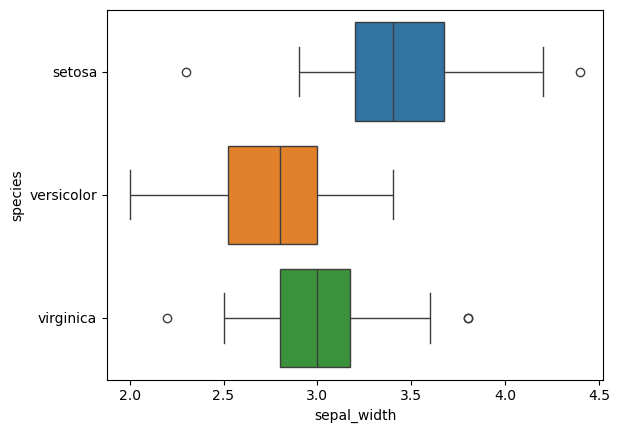

In [10]:
sns.boxplot(data=iris_data, x='sepal_width', y='species', hue='species')

The plot above uses 1.5 times the _IQR_ as distance from the first and third quartiles to determine the outliers. This definition and proportion were proposed by American mathematician and statistician John Tukey and are used as default value. This can be changed using the `whis`-parameter by either providing a different proportion (i.e. a single value) or a sequence to set the the whiskers at specific percentiles of the data:

<Axes: xlabel='sepal_width', ylabel='species'>

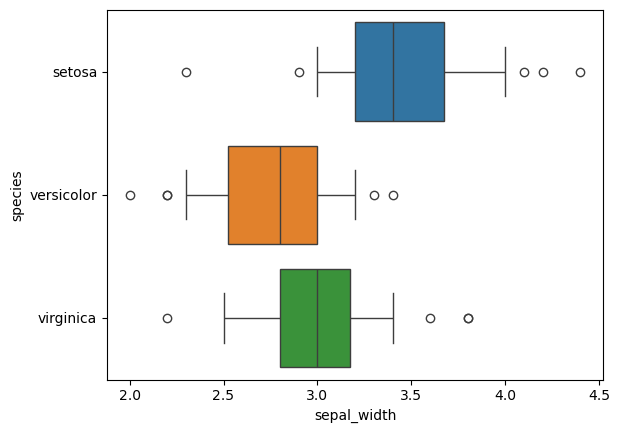

In [11]:
sns.boxplot(data=iris_data, x='sepal_width', y='species', whis=[5,95], hue='species')

Since the data ranges for this feature overlap for the respective species, an identification can not be accomplished. Let's look at the remaining features by using _Matplotlib_'s `subplots`:

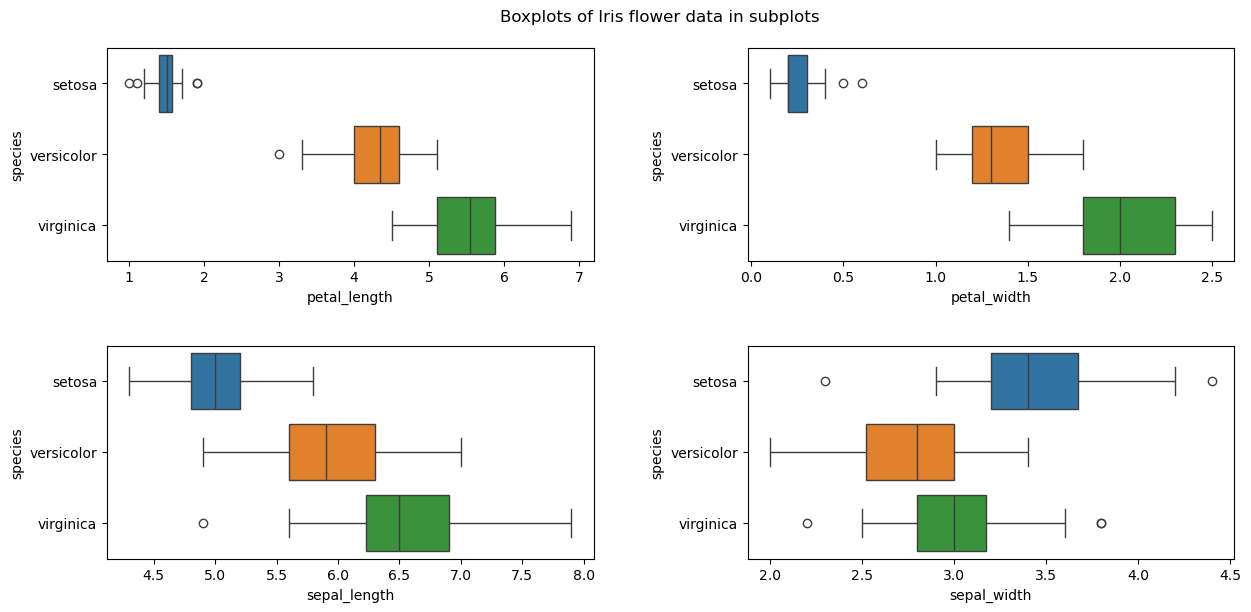

In [12]:
fig, axes= plt.subplots(2,2, figsize=(12, 6)) # 2x2 subplots
fig.suptitle('Boxplots of Iris flower data in subplots')
fig.tight_layout(h_pad=4, w_pad=8) # adjust height- and width padding (distances between plots)
sns.boxplot(data=iris_data, x='petal_length', y='species', ax=axes[0, 0], hue='species') # horizontal orientation
sns.boxplot(data=iris_data, x='petal_width', y='species',  ax=axes[0, 1], hue='species')
sns.boxplot(data=iris_data, x='sepal_length', y='species', ax=axes[1, 0], hue='species')
sns.boxplot(data=iris_data, x='sepal_width', y='species',  ax=axes[1, 1], hue='species');

One can see, that _petal length_ and _petal width_ already allow for a separation of _setosa_. However a
combination of features will be necessary for a considerable separation of _versicolor_ from _virginica_
(see later).

A **_violin plot_** plays a similar role as a _box-and-whiskers plot_ by showing the distribution of quantitative data and allowing a comparison when using multiple categorical variables. But, unlike a box plot, the violin plot displays the underlying distribution by using a _kernel density estimation_ (or _KDE_ for short): a mathematical method to estimate the unknown data distribution in form of a continuous function considering the data set as a random sample of that distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

Let's try it out on the _petal width_, which seems promising according to the box plots above. We switched the `x`- and `y`-axis for demonstration purposes - allowing you to guess the origin of the plot type's name.

<Axes: xlabel='species', ylabel='petal_width'>

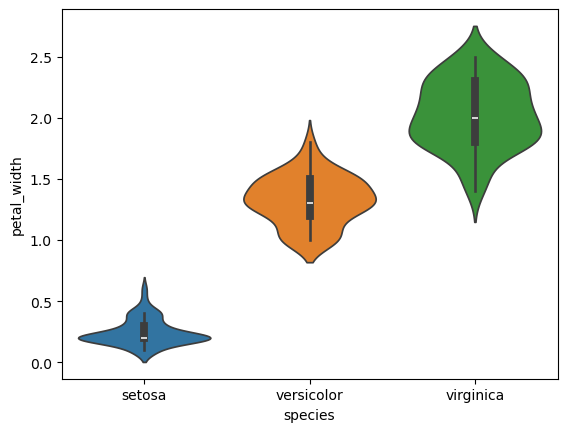

In [13]:
sns.violinplot(data=iris_data, x='species', y='petal_width', hue='species')

We can use the `inner` parameter to select the violins interior: The default is `box`, for displaying a miniature box plot. We can also display the quartiles as follows:

<Axes: xlabel='species', ylabel='petal_width'>

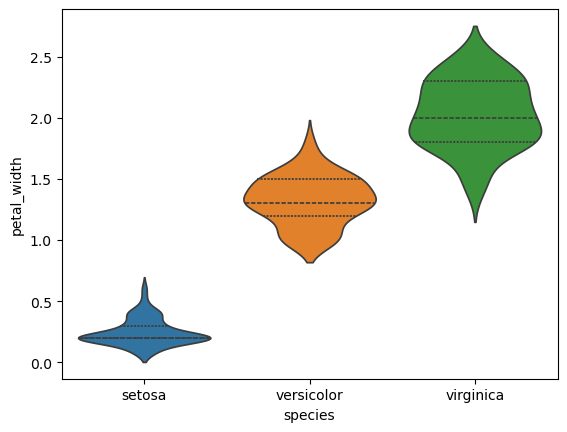

In [14]:
sns.violinplot(data=iris_data, x='species', y='petal_width', inner='quartile', hue='species')

**_Strip plots_** pose another good alternative - or a complement - to box and violin plots. In this visualization technique the values are plotted as dots _scattered_ along an axis. To avoid overlapping some random _jitter_ is added perpendicular to the numerical axis - try the code below with the parameter `jitter=False` added, and you'll see the difference:

<Axes: xlabel='species', ylabel='petal_width'>

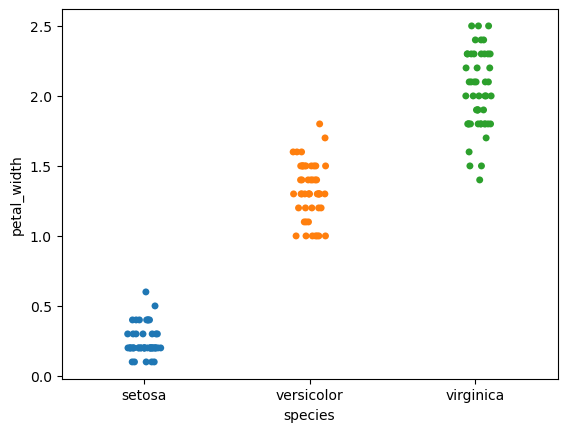

In [15]:
sns.stripplot(data=iris_data, x='species', y='petal_width', hue='species')

Strip plots are especially useful in combination with box or violin plots, allowing us to show all observations along with some representation of the underlying distribution.

Since _Jupyter Notebook_ reuses the same _figure_, we can easily create a combination of two plots as seen in the example below, showing both distribution and observations of the _petal length_. We adjusted the violin plot's color for better readability.

N.B.: If you want to create multiple plots in different figures, you can use `plt.figure()`. Insert a call _between_ the lines below and see for yourself.

<Axes: xlabel='species', ylabel='petal_length'>

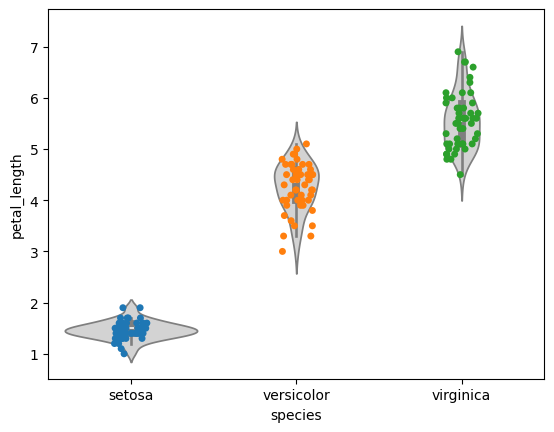

In [16]:
sns.violinplot(data=iris_data, x='species', y='petal_length', color='lightgray')
sns.stripplot(data=iris_data, x='species', y='petal_length', hue='species')

Lastly, let's take a look at a close relative of the strip plot: the **_swarm plot_** (or _beeswarm_). While being nearly identical, the latter technique adjusts the points along the categorical axis so they don't overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations - try out the example below with a higher `size` parameter and you'll see.

<Axes: xlabel='species', ylabel='petal_length'>

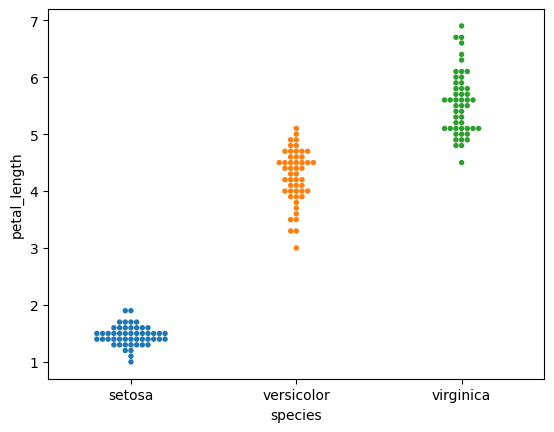

In [17]:
sns.swarmplot(data=iris_data, x='species', y='petal_length', size=3.9, hue='species')

The features _petal length_ and _petal width_ obviously allow an identification of the species _setosa_, but _versicolor_ and _virginica_ are still not separable.

## _Histograms_ And _Density Plots_

**_Histograms_** are another widely used visualization technique used for creating a representation of the distribution of numerical data. This happens by dividing the range of values into smaller, non-overlapping intervals (so called _bins_) and counting how many values fall into each of these intervals.

Now let's address the separation of _virginica_ and _versicolor_ by looking at the feature _sepal length_ for each species with different `bin` sizes - note the usage of the `hue` parameter for mapping a categorical variable to the color of the bars. 

<Axes: xlabel='sepal_length', ylabel='Count'>

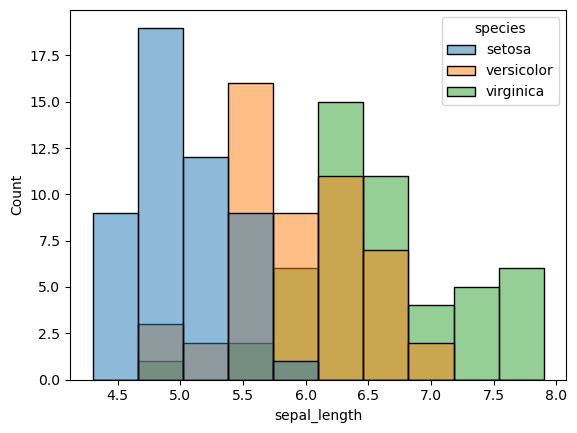

In [18]:
sns.histplot(data=iris_data, x="sepal_length", hue='species', bins=10)

<Axes: xlabel='sepal_length', ylabel='Count'>

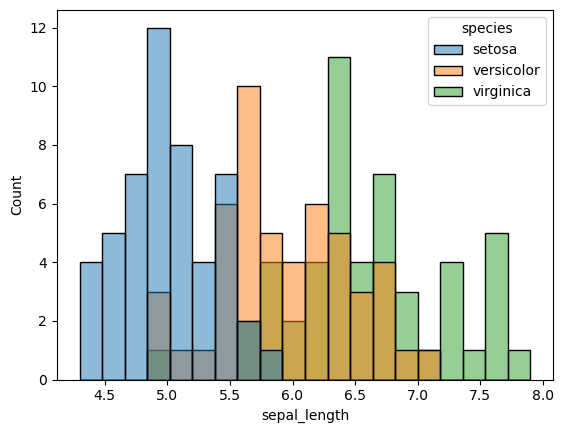

In [19]:
sns.histplot(data=iris_data, x="sepal_length", hue='species', bins=20)

Let's use another plot type you'll already recognize from our violins: A _kernel density estimate plot_ (or _KDE plot_) works analogous to a histogram, but represents the data as a continous curve. Note the use of the `fill` parameter, determining if the area under the curve should be filled.

<Axes: xlabel='sepal_length', ylabel='Density'>

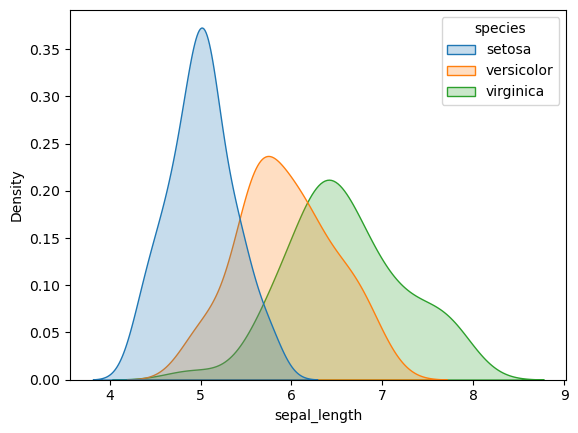

In [20]:
sns.kdeplot(data=iris_data, x='sepal_length', hue='species', fill=True)

We can also combine both visualiziation techniques by simply using the `kde`-parameter when plotting a histogram:

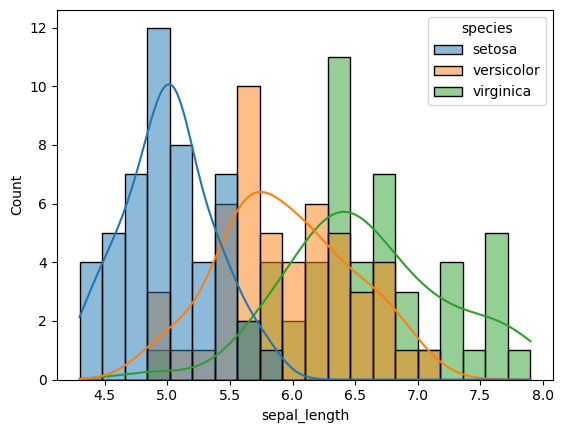

In [21]:
sns.histplot(data=iris_data, x="sepal_length", hue='species', kde=True, bins=20);

As you see, the three species overlap significantly. Let's use a `for`-loop to iterate and create a separate histogram for each feature:

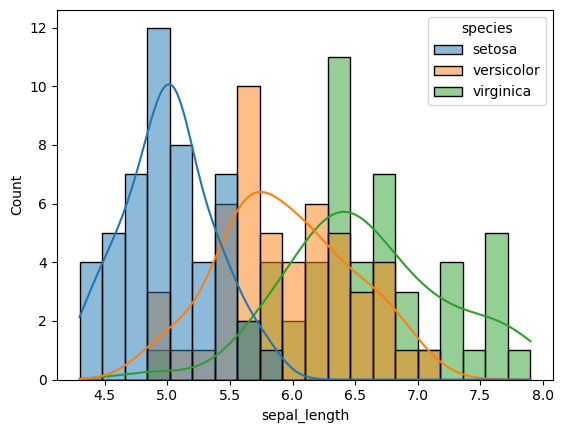

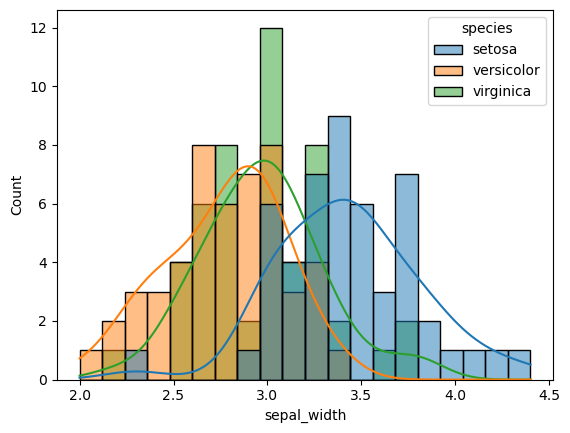

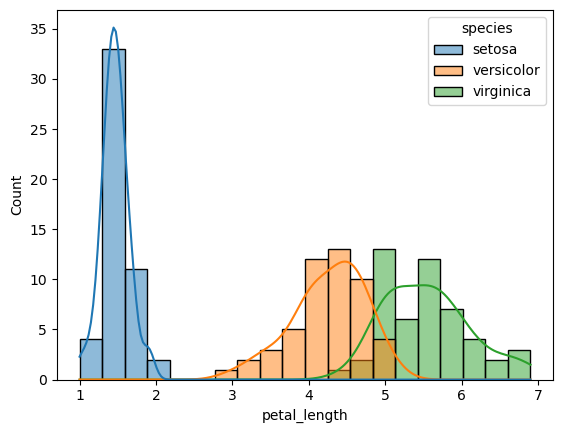

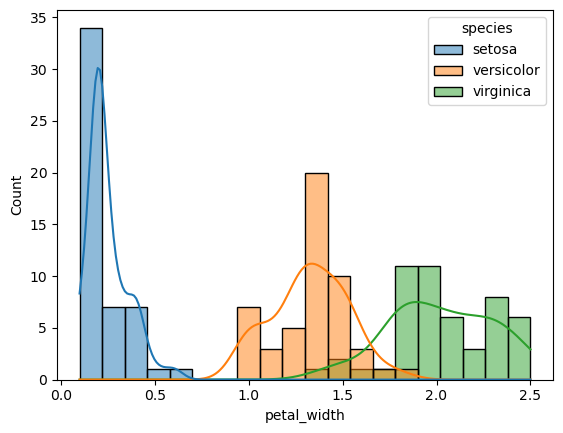

<Figure size 640x480 with 0 Axes>

In [22]:
feature_columns = iris_data.columns.values.tolist();
for curr_feature_column in feature_columns[:-1]:
    sns.histplot(data=iris_data, x=curr_feature_column, hue='species', kde=True, bins=20)
    plt.figure() #create figure for each plot, otherwise all plots will show up in the same figure

## _Bivariate Plots_

While we clearly saw, that _sepal length_ and _sepal width_ had a lot of overlaps in the histograms - maybe a combination of both would enable the identification of the species?

Let's try it out with a **__scatter plot__**, which could be described as a _strip plot_ in two dimensions. By adding a `hue` we can add a third dimension - be it by shape (e.g. squares, circles, triangles...), color or size.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

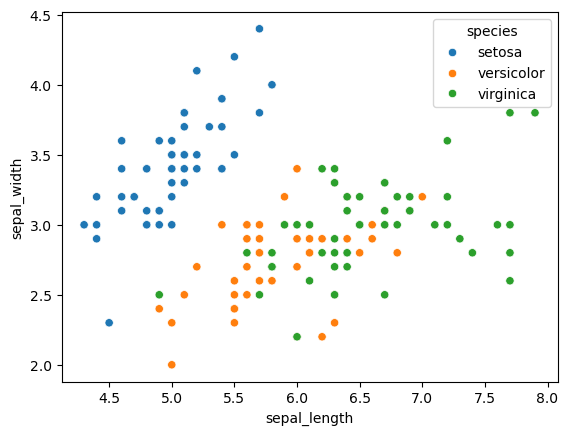

In [23]:
sns.scatterplot(data=iris_data, x="sepal_length", y="sepal_width", hue='species')

What we have here is a _bivariate_ plot, showing the relationship between two variables that have been measured on a single sample. Such a plot permits you to recognize patterns in the data at a glance! In contrast, so far we have only worked with _univariate_ plots, in which we considered only one variable of interest at a time.

We can also use histograms and _KDE_ plots for bivariate visualizations. In the examples in the last section, we only set one axis parameter. Take a look what happens, when we set both:

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

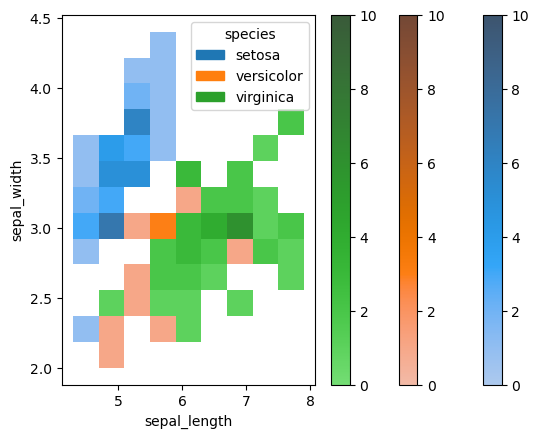

In [24]:
sns.histplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species', cbar=True)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

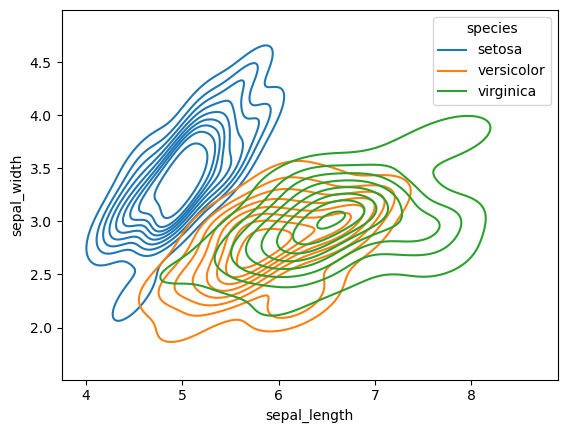

In [25]:
sns.kdeplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species')

Notice something by looking at the plots? While _versicolor_ and _virginica_ still overlap, we can now identify a cluster of _setosa_ flowers by using _sepal length_ and _sepal width_ - we would not have seen that in the one-dimensional visualizations!

To underline this observation, _seaborn_ even allows us to combine uni- and bivariate plots using a **_joint plot_**:

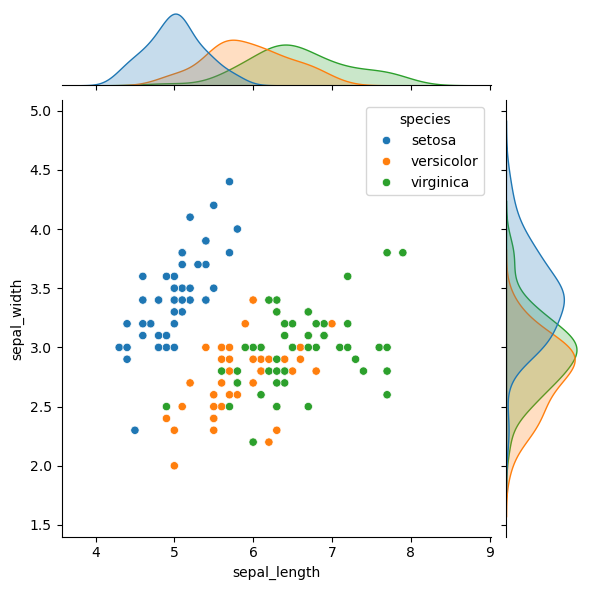

In [26]:
sns.jointplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species')

While offering us some combinations out-of-the-box by changing the `kind` parameter - try out `hex` and `kde` for instance - the joint plot is a high-level interface for `JointGrid`, which allows full control of the visualizations used:

<Axes: xlabel='Density', ylabel='sepal_width'>

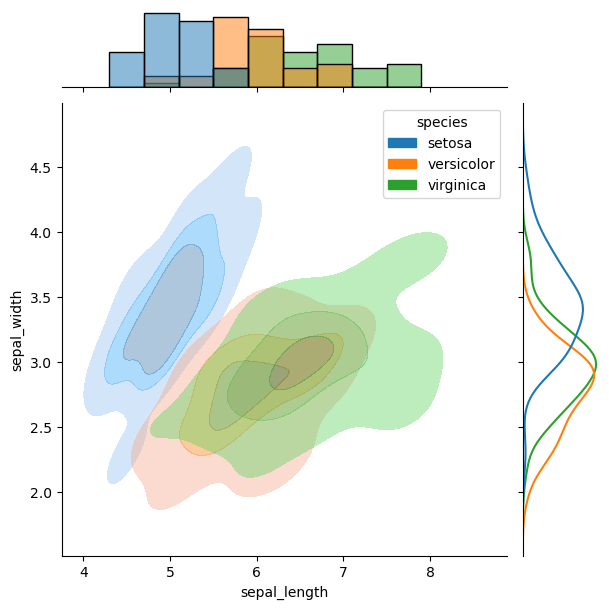

In [27]:
joint_grid = sns.JointGrid()
sns.kdeplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species', fill=True, alpha=0.4, levels=4, ax=joint_grid.ax_joint)
sns.histplot(data=iris_data, x='sepal_length', hue='species', legend=False, ax=joint_grid.ax_marg_x)
sns.kdeplot(data=iris_data, y='sepal_width', hue='species', legend=False, ax=joint_grid.ax_marg_y)

## _Pair Plots_ And _Correlation_

Convieniently, _seaborn_ offers a very comfortable plotting class to investigate all possible combinations of numerical features - the **_pair plot_**, allowing us to quickly identify the most meaninful combinations of features for categorization.

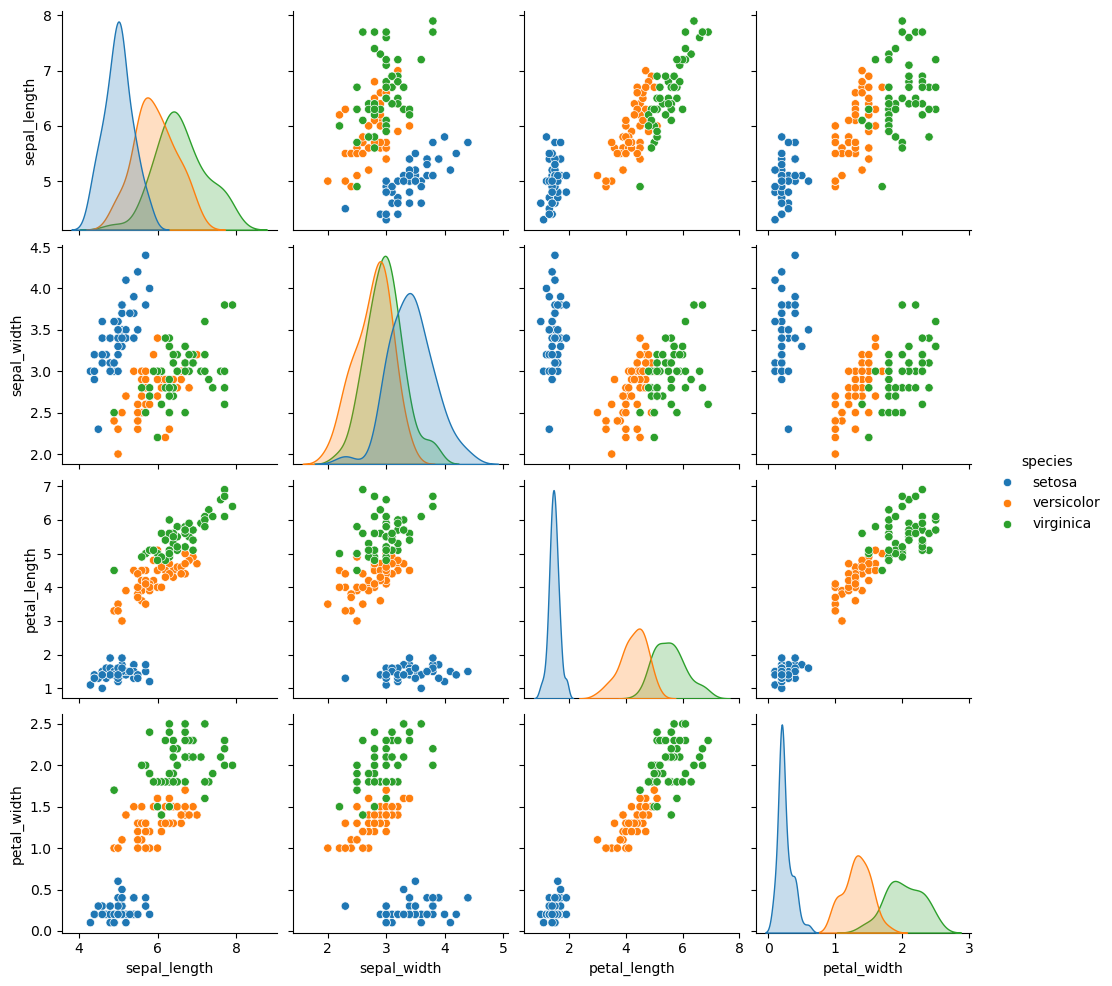

In [28]:
sns.pairplot(data=iris_data, hue='species')

Internally, a _pair plot_ in _seaborn_ is just a high-level interface for its `PairGrid`, which we can access and modify as follows:

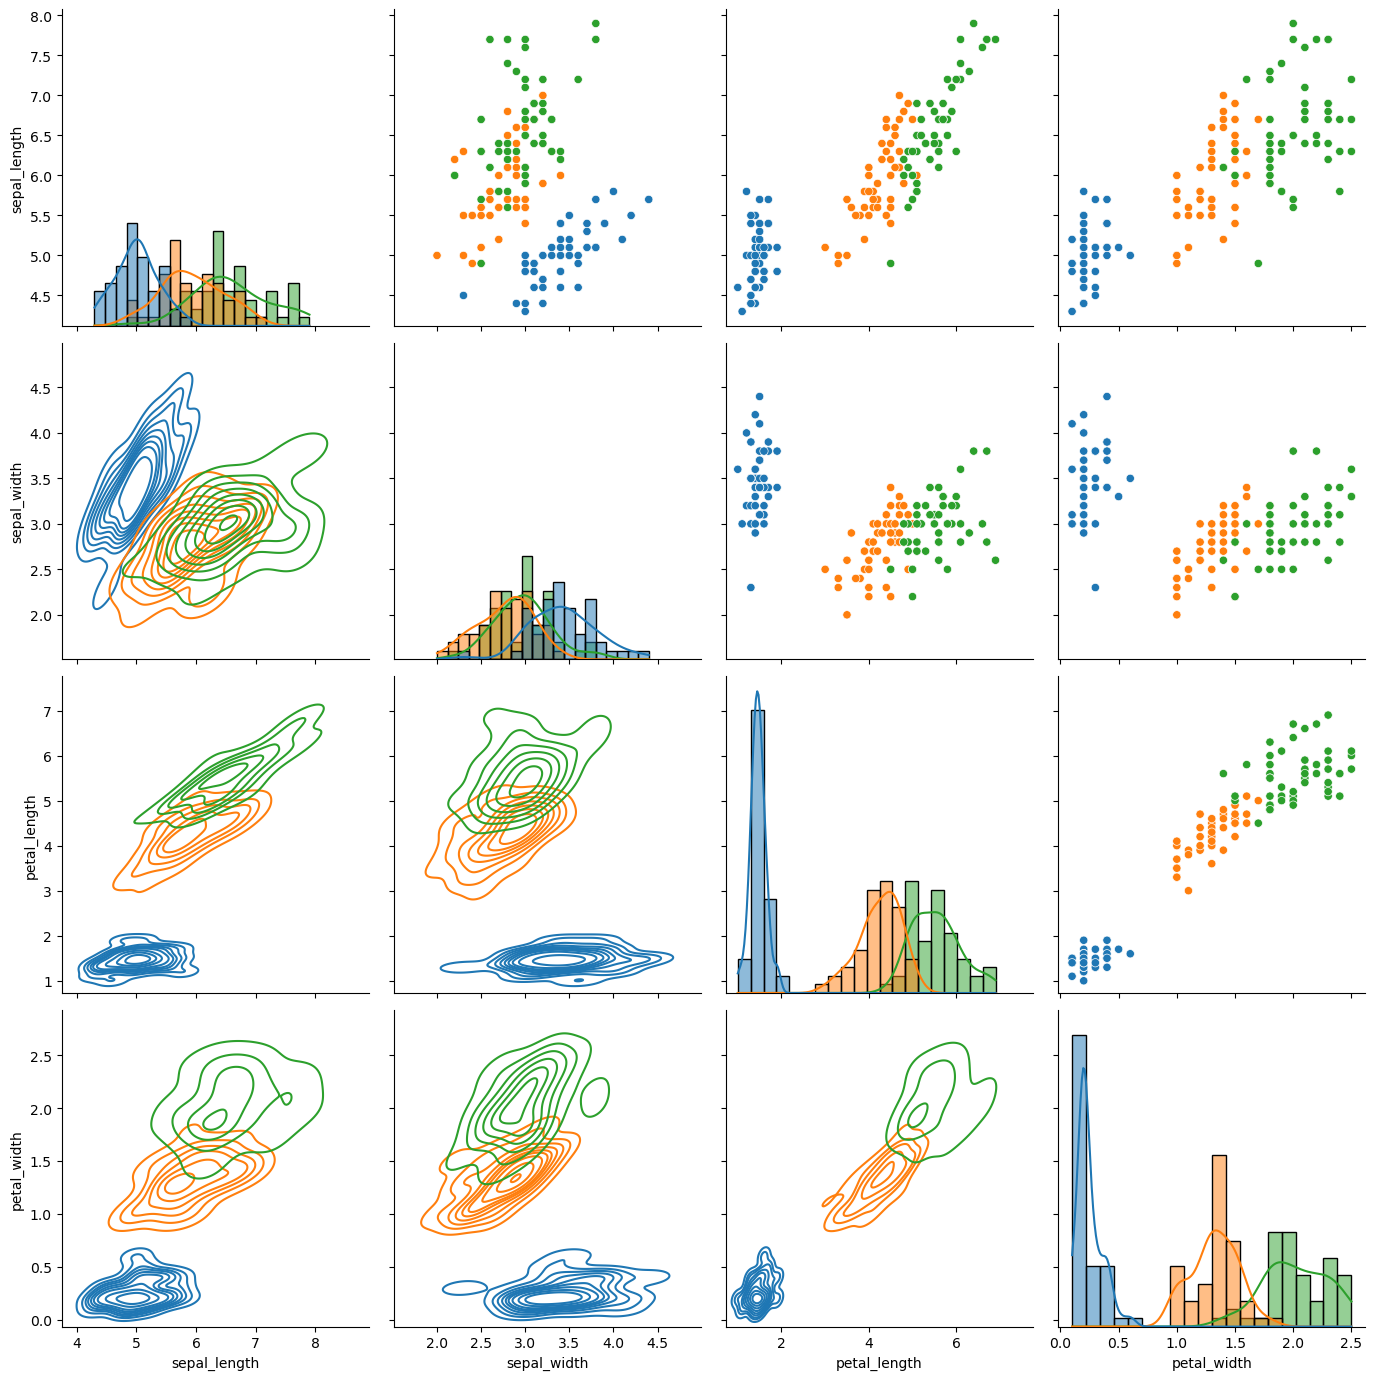

In [29]:
# plot redundance in different plot style (kdeplot)
pair_grid = sns.PairGrid(iris_data, hue='species', height=3.5, layout_pad=0.2)
pair_grid.map_diag(sns.histplot, bins=20, kde=True) # plots of main diagonal
pair_grid.map_upper(sns.scatterplot) # plots above the main diagonal
pair_grid.map_lower(sns.kdeplot, legend=True); # plots below the main diagonal

The plots above again illustrate, that the combination of _petal length_ and _petal width_ are particularly suitable for the categorization of the three species. These two features also show a clearly positive **_correlation_**, which means larger values of petal length imply larger values of sepal width. In contrast sepal length and sepal width show a slightly negative correlation. The correlation matrix holds the correlation coefficients of all feature combinations:

In [30]:
iris_data.select_dtypes(include=np.number).corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

The correlation matrix may be illustrated in a heatmap. Here lighter colors mean higher, positive correlation:

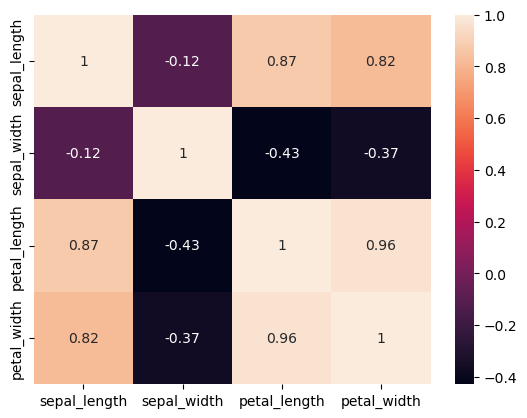

In [31]:
sns.heatmap(iris_data.select_dtypes(include=np.number).corr(), annot=True); # plot heatmap of the correlation matrix, annotation enabled

Correlation is often confused with **causality**, which refers to a relationship where one event directly causes another to happen. Unlike correlation, which simply indicates that two variables change together, causality implies a cause-and-effect link.

For example, there’s a correlation between ice cream sales and drowning incidents - both rise in summer. However, buying ice cream doesn’t cause drowning. Here, hot weather is a confounding variable or hidden causality that influences both ice cream sales and swimming activity, indirectly creating a correlation between them. Recognizing such hidden factors helps us understand that while correlation may hint at a relationship, it doesn’t prove causation.

# Colors

Time for a quick break: Let's talk about colors.

When creating a data visualization, our goal is to communicate the insights found in the data. While our primary objective should be picking colors that make our data easily readable, it should also be aesthetically pleasing.

_seaborn_ already provides a nice _color palette_ - we can take a closer look at it like this:

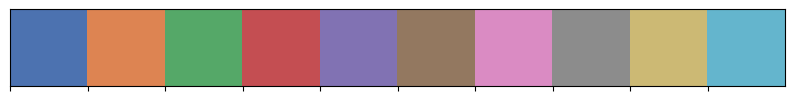

In [32]:
default_palette = sns.color_palette('deep')
sns.palplot(default_palette)

Apart from its variations `muted`, `pastel`, `bright`, `dark` and `colorblind` (try them out!), _seaborn_ also allows us to use palettes from the _ColorBrewer_-tool - an online tool made for finding suitable color schemes for maps and diagrams.

The color palettes are divided into three categories:

* A **diverging** color palette is used for coding ordered/numeric information around a central neutral value, i.e. where colors diverge from neutral to two extremes.
* A **sequential** palette is designed for coding ordered/numeric information, i.e. going from high to low (or vice versa).
* A **qualitative** palette is used when the variable is categorical in nature. Categorical variables are those that take on distinct labels without inherent ordering.

![](images/color_brewer.jpg)



We can access and display the color palettes as follows:

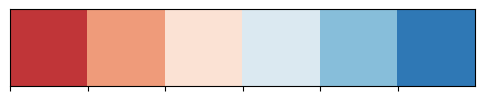

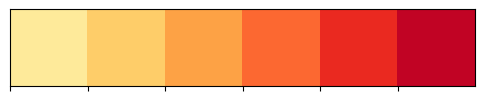

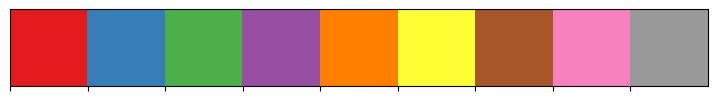

In [33]:
sns.palplot(sns.color_palette('RdBu'))
sns.palplot(sns.color_palette('YlOrRd'))
sns.palplot(sns.color_palette('Set1'))

We can _reverse_ a color palette by adding the suffix `_r` to its name:

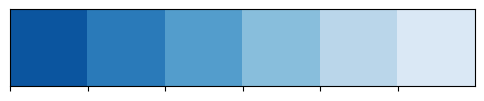

In [34]:
sns.palplot(sns.color_palette('Blues_r'))

We can use the names of these palettes directly where a `palette` is expected. Let's try it out by creating three plots using different palettes - a _diverging_ one, a _qualitative_ one and a _sequential_ one.

<Figure size 640x480 with 0 Axes>

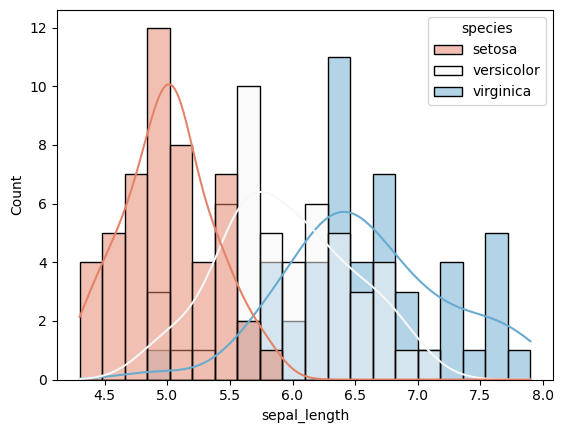

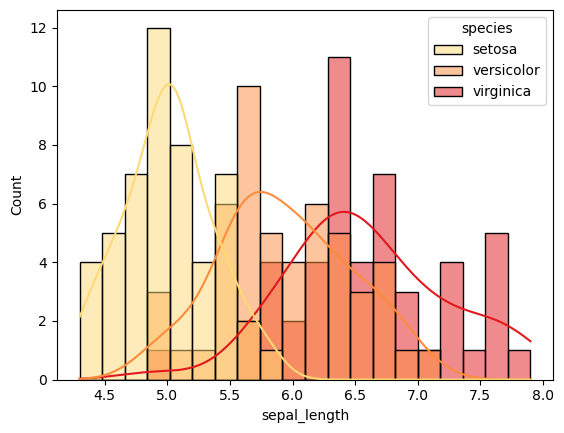

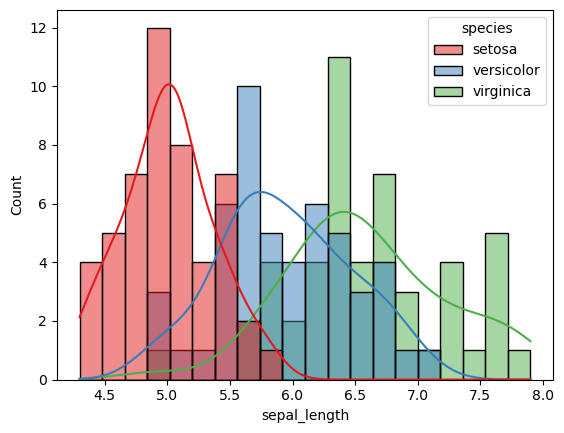

<Figure size 640x480 with 0 Axes>

In [35]:
sns.histplot(data=iris_data, x="sepal_length", hue='species', kde=True, palette='RdBu', bins=20);
plt.figure()
sns.histplot(data=iris_data, x="sepal_length", hue='species', kde=True, palette='YlOrRd', bins=20);
plt.figure()
sns.histplot(data=iris_data, x="sepal_length", hue='species', kde=True, palette='Set1', bins=20);
plt.figure()

It's obvious, which palette suits our last problem best - a _qualitative_ one allows us to easily distinguish categorical variables.

Of course we can also create our own palettes, since `color_palette()` accepts a list of colors. We can use hexadecimal colors or - to combine practicality and fun - use named colors from the _xkcd color survey_: A crowdsourced effort to name random colors, resulting in some hilarious results.

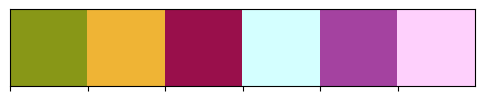

In [36]:
funny_colors = sns.xkcd_palette(['baby shit green', 'macaroni and cheese', 'berry', 'really light blue', 'ugly purple', 'pale mauve'])
sns.palplot(funny_colors)

We can again use the `palette` parameter of a specific plot:

/tmp/ipykernel_853110/1447874447.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.stripplot(data=iris_data, x='species', y='petal_length', palette=funny_colors, hue='species')


<Axes: xlabel='species', ylabel='petal_length'>

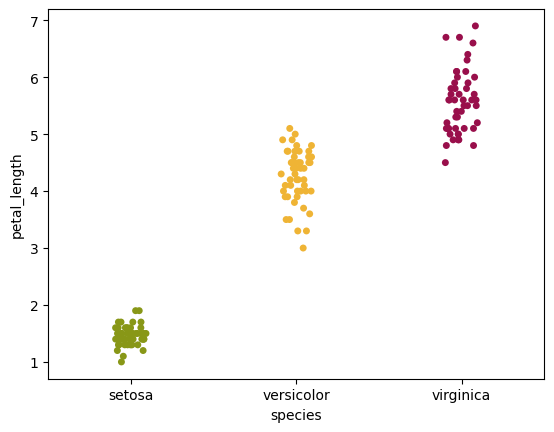

In [37]:
sns.stripplot(data=iris_data, x='species', y='petal_length', palette=funny_colors, hue='species')

Or use `set_palette` to set the palette for all following plots:

N.B.: Instead of our variable we could also pass the name of a predefined palette.

In [38]:
sns.set_palette(funny_colors)

# Visualizing Sleep Quality

## Background

While giving us a great starting point into the field of data visualization, the _Iris_ dataset unfortunately has only one categorical variable. To demonstrate how we could work with more categorical variables, we'll be using a (synthetic) dataset covering sleep and lifestyle habits of nearly 400 people.

![](images/so_sleepy.jpg)

## Loading And Exploring The Data

Let's again start with a quick exploration of the data we're dealing with:

In [39]:
sleep_data = pd.read_csv('input/sleep.csv')

In [40]:
sleep_data.sample(n=10)

Person ID  Gender  Age         Occupation  Sleep Duration  \
152         35    Male   31             Doctor             7.7   
109        217    Male   43           Engineer             7.8   
120         56    Male   32             Doctor             6.0   
305        291  Female   50              Nurse             6.0   
27          28    Male   30             Doctor             7.9   
227        197    Male   43        Salesperson             6.5   
173        257  Female   45            Teacher             6.6   
90         119  Female   37         Accountant             7.2   
268        332  Female   53           Engineer             8.4   
204          6    Male   28  Software Engineer             5.9   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
152                 7                       75             6       Normal   
109                 8                       90             5       Normal   
120                 6                       30             8       Normal   
305                 6                       90             8   Overweight   
27                  7                       75             6       Normal   
227                 6                       45             7   Overweight   
173                 7                       45             4   Overweight   
90                  8                       60             4       Normal   
268                 9                       30             3       Normal   
204                 4                       30             8        Obese   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
152         120/80          70         8000            NaN  
109         130/85          70         8000            NaN  
120         125/80          72         5000            NaN  
305         140/95          75        10000    Sleep Apnea  
27          120/80          70         8000            NaN  
227         130/85          72         6000       Insomnia  
173         135/90          65         6000       Insomnia  
90          115/75          68         7000            NaN  
268         125/80          65         5000            NaN  
204         140/90          85         3000       Insomnia

In [41]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [42]:
sleep_data.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

## _Small Multiples_

As described above, we can add additional _dimensions_ to our plots by using colors, shapes and sizes - e.g. we can investigate the relationship between age, _BMI_, gender and sleep duration as follows:

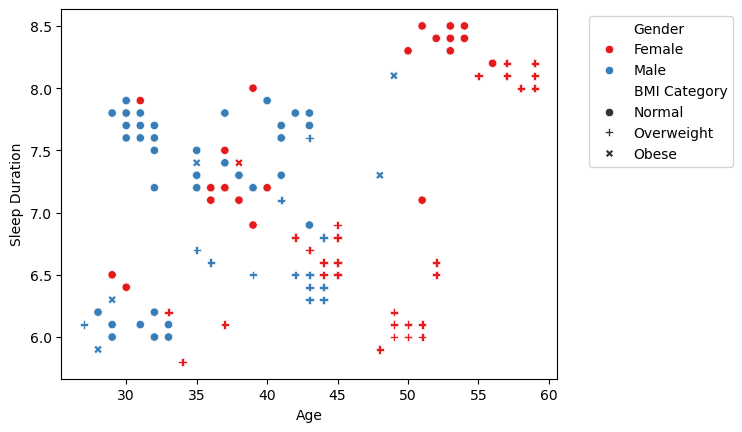

In [43]:
sns.scatterplot(data=sleep_data, x='Age', y='Sleep Duration', style='BMI Category', hue='Gender', palette='Set1', style_order=['Normal', 'Overweight', 'Obese'], markers=['o', 'P', 'X'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Unfortunately, as you surely noticed, the plot gets harder to interpret the more variables we cram in.

Another technique we can utilize for data with multiple categorical variables is *__small multiples__* - also commonly called _lattice charts_, _trellis charts_, _grid charts_ or _panel charts_. The idea is to draw multiple instances of the same plot (using the same scale and axes!) on different subsets of our dataset. This way we can use _rows_ and _columns_ for adding additional dimensions:

Let's try to re-investigate the relationship between age and sleep duration considering a person's gender (as _column_) and _BMI_ (as _shape_). We'll use a `relplot` for this:

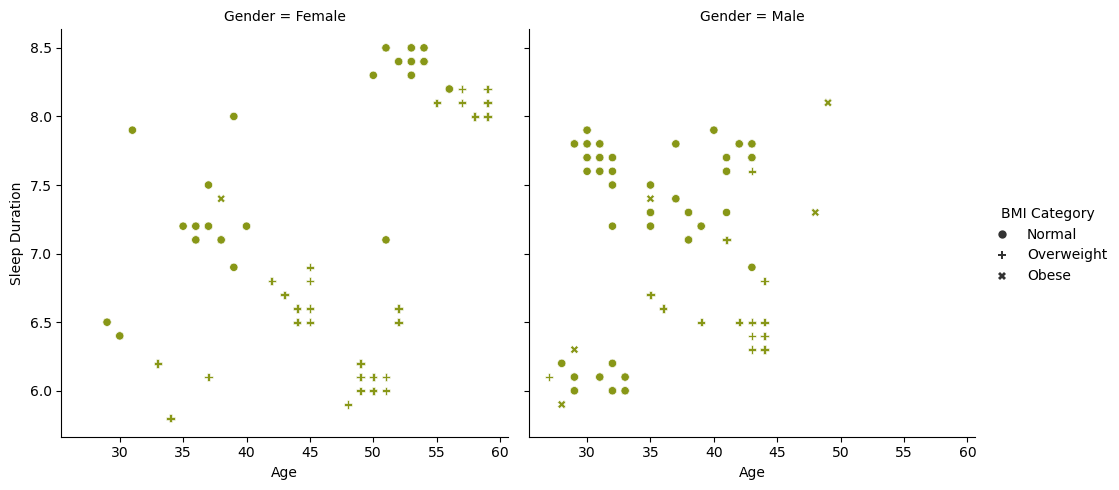

In [44]:
sns.relplot(data=sleep_data, x='Age', y='Sleep Duration', col='Gender', style='BMI Category', style_order=['Normal', 'Overweight', 'Obese'], markers=['o', 'P', 'X'])

We can break it down even further, by displaying the _BMI_ using _rows_ instead of different shapes:

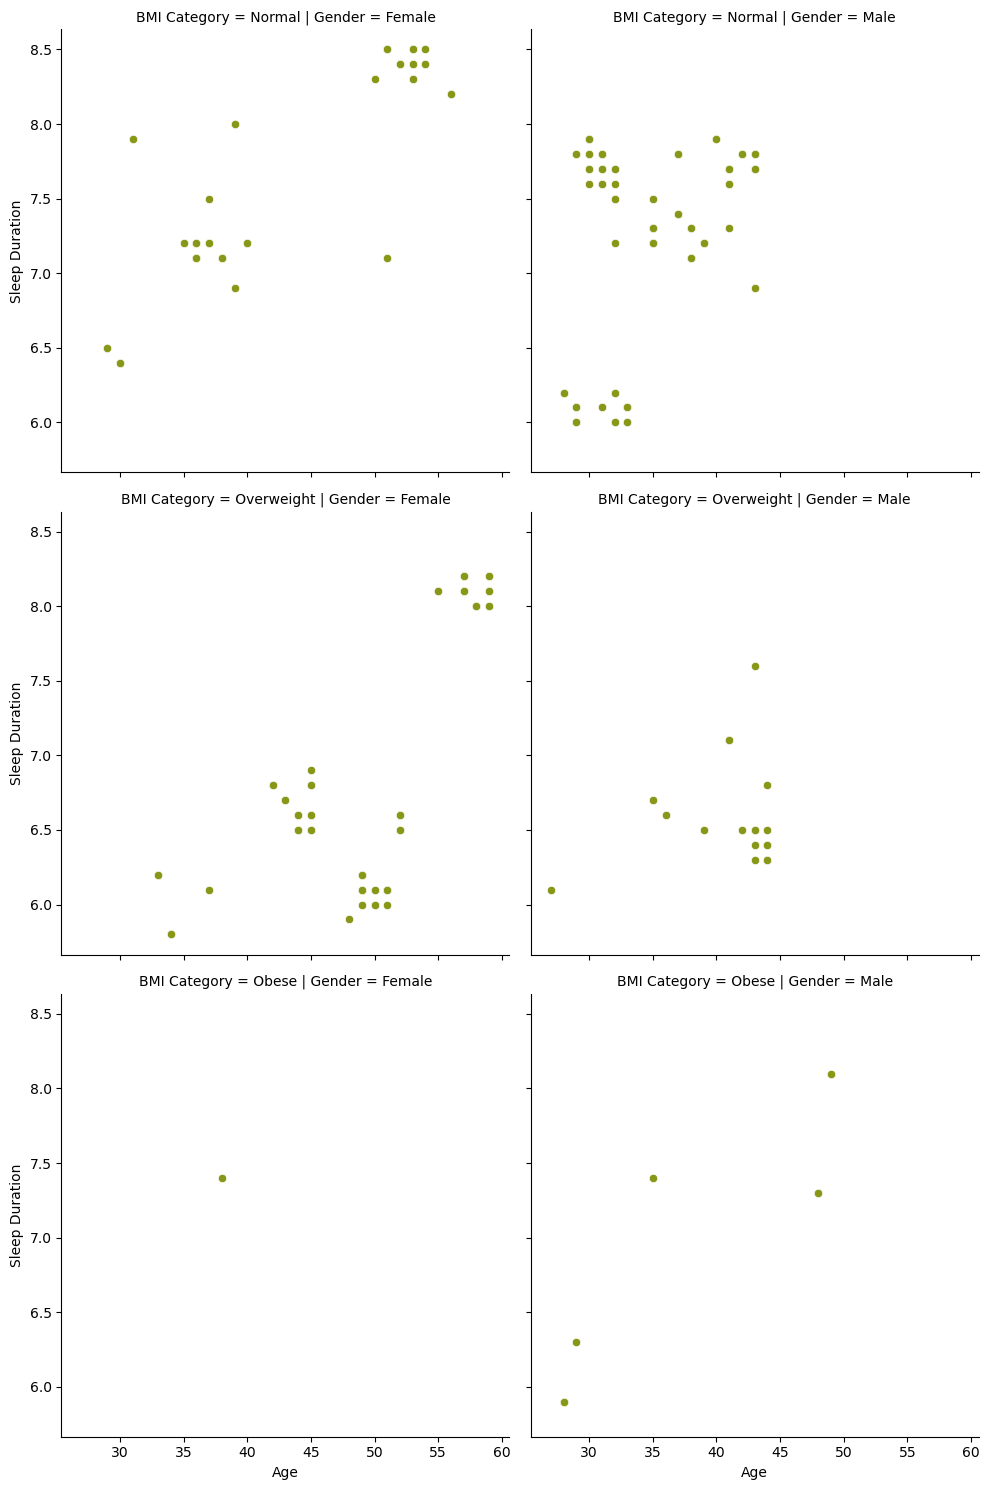

In [45]:
sns.relplot(data=sleep_data, x='Age', y='Sleep Duration', col='Gender', row='BMI Category', row_order=['Normal', 'Overweight', 'Obese'])

Of course we can also visualize relationships between numerical and categorical variables - we'll use a `catplot` for that. Let's use _boxes_ and _strips_ to investigate whether we can find connections between the _BMI_, gender and physical activity levels.

N.B.: As you're surely noticing, we choose the visualization method using the `kind`-parameter. Most of these are simply the names of the corresponding method without the _plot_-suffix- e.g. `box` $\rightarrow$ `sns.boxplot`.

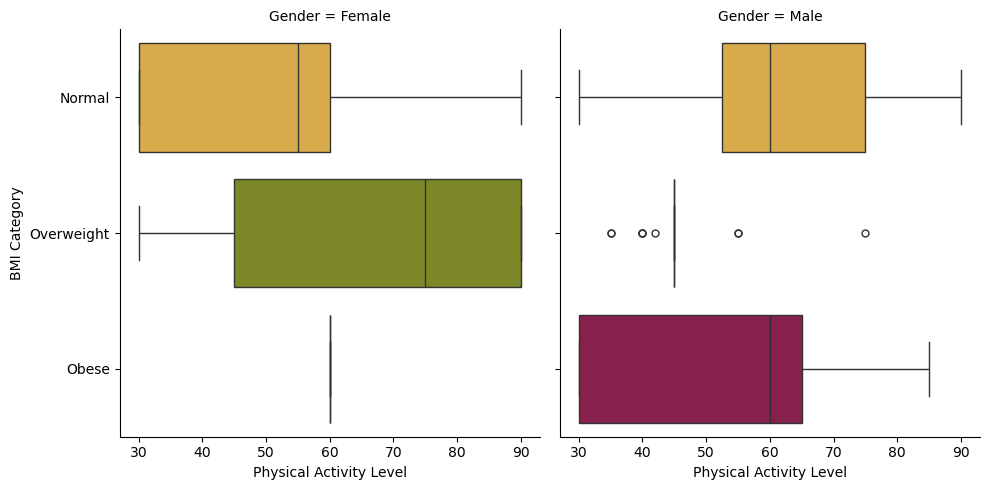

In [46]:
sns.catplot(data=sleep_data, x='Physical Activity Level', y='BMI Category', col='Gender', kind='box', orient='h', order=['Normal', 'Overweight', 'Obese'], hue='BMI Category')

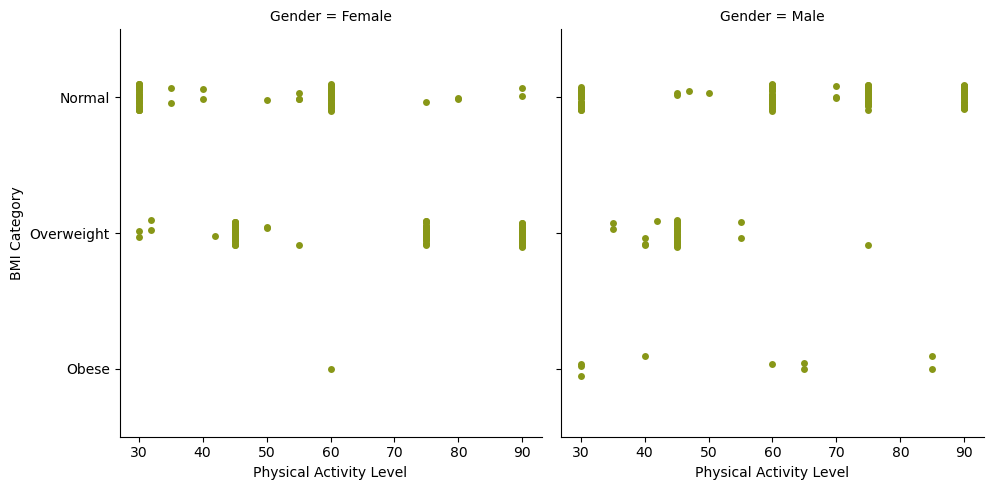

In [47]:
sns.catplot(data=sleep_data, x='Physical Activity Level', y='BMI Category', col='Gender', kind='strip', orient='h', order=['Normal', 'Overweight', 'Obese'])

So far we got to know:

* `relplot`s for showing the relationship between two numerical variables, e.g. `scatterplot`s.
* `catplot`s for showing the relationship between a numerical and categorical variables, e.g. `stripplots`, `boxplots` or `violinplots`.

The third and last one is `displot`, used for visualizing the distribution of a variable by using _histograms_ or _KDE_ plots. Let's try it out by taking a look at the sleep quality depending on a person's _BMI_ and gender.

N.B.: All three methods are just easy-to-use interfaces for `FacetGrid`. If you need more flexibility and control over the plot, you should look into that.

/tmp/ipykernel_853110/2504692122.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=sleep_data, x='Quality of Sleep', col='Gender', kind='kde', hue='BMI Category', hue_order=['Normal', 'Overweight', 'Obese'], fill=True, common_norm=False)


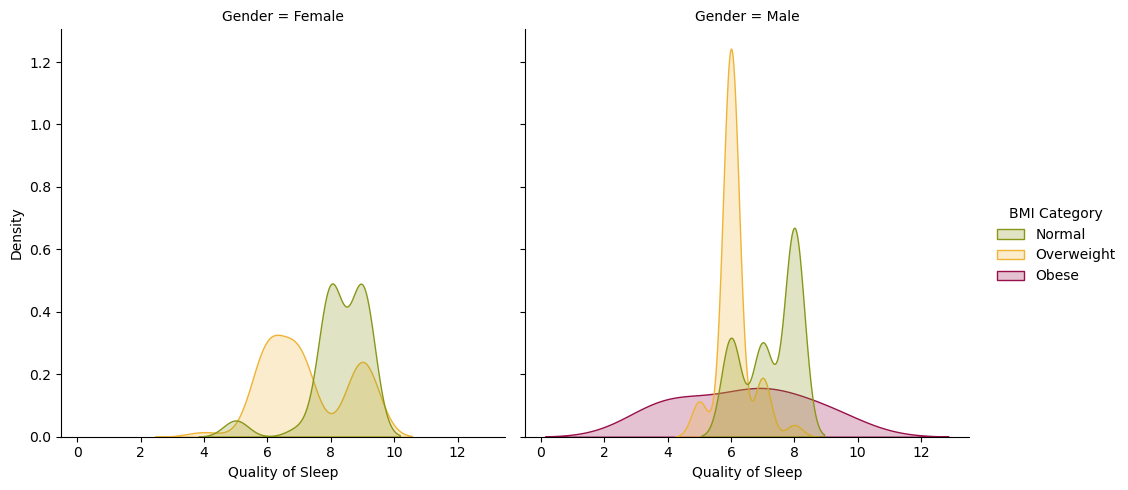

In [48]:
sns.displot(data=sleep_data, x='Quality of Sleep', col='Gender', kind='kde', hue='BMI Category', hue_order=['Normal', 'Overweight', 'Obese'], fill=True, common_norm=False)

It looks like there is a _huge_ number of overweight men with average sleep quality in our dataset.

Let's use a **count plot** to investigate our assumption:

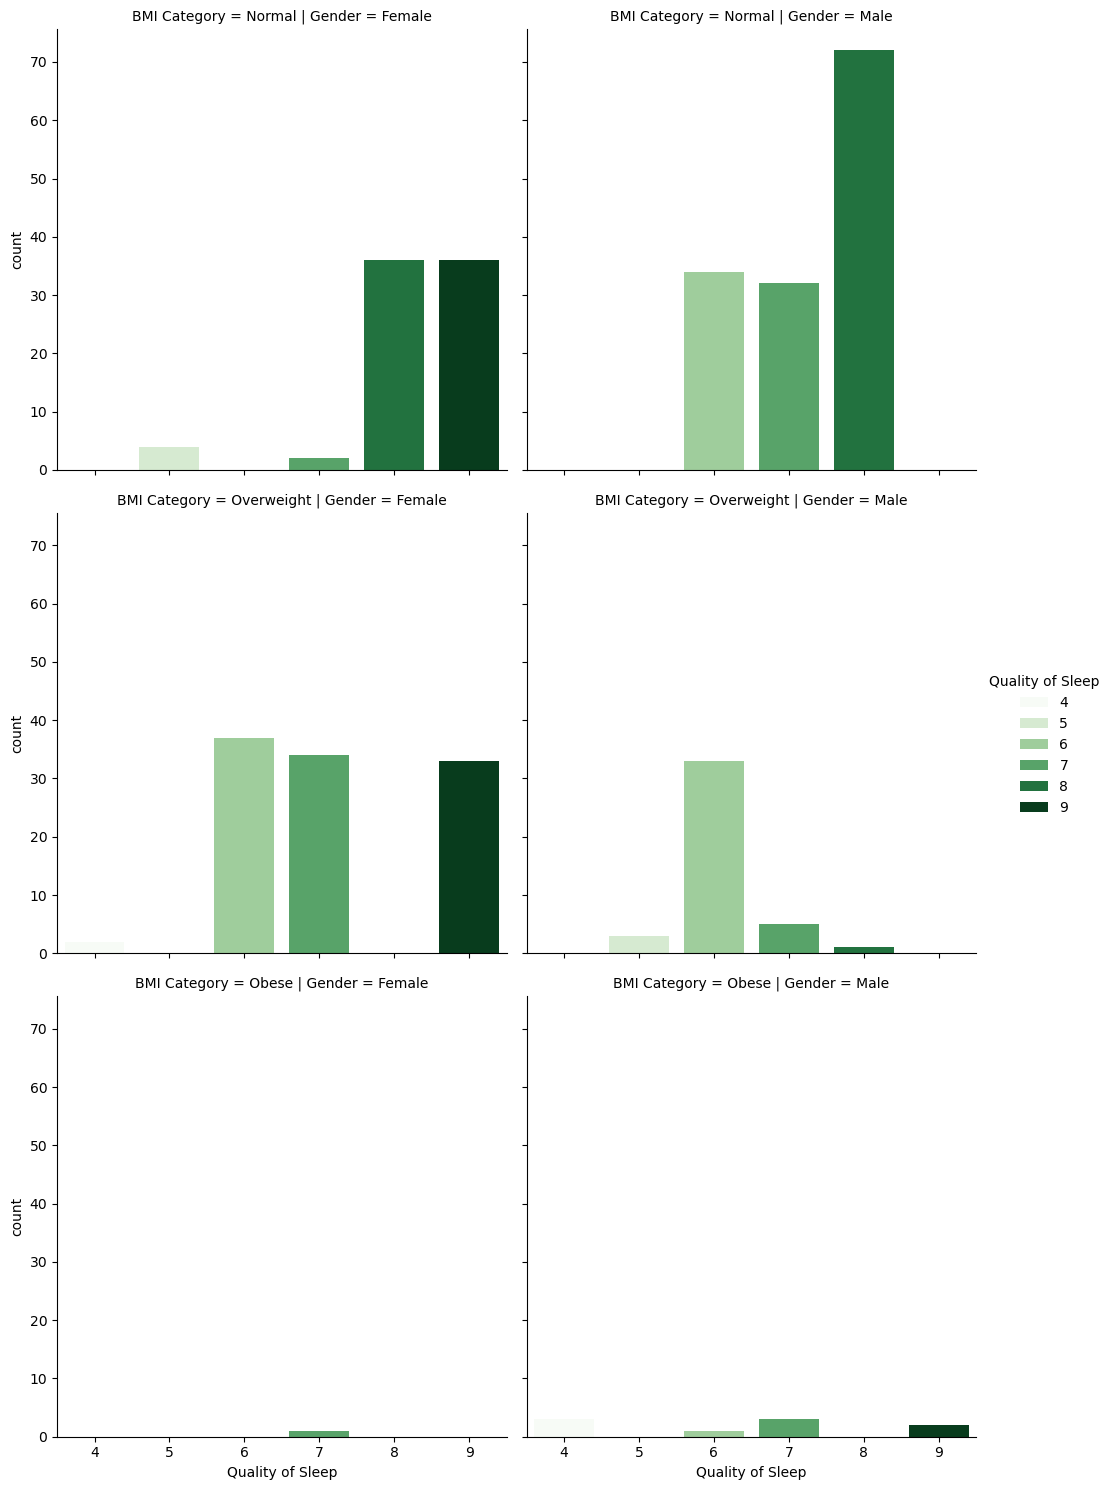

In [49]:
sns.catplot(data=sleep_data, x='Quality of Sleep', col='Gender', row='BMI Category', kind='count', palette='Greens', hue='Quality of Sleep', row_order=['Normal', 'Overweight', 'Obese'])

The reason why the last _KDE_ plot was misleading was the lack of scaling. By definition, the area below each curve is $1$. Using the `common_norm` parameter, we can scale the densities so that the _total_ area under _all_ curves sums to $1$:

/tmp/ipykernel_853110/3473157375.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=sleep_data, x='Quality of Sleep', col='Gender', kind='kde', hue='BMI Category', hue_order=['Normal', 'Overweight', 'Obese'], fill=True, common_norm=True)


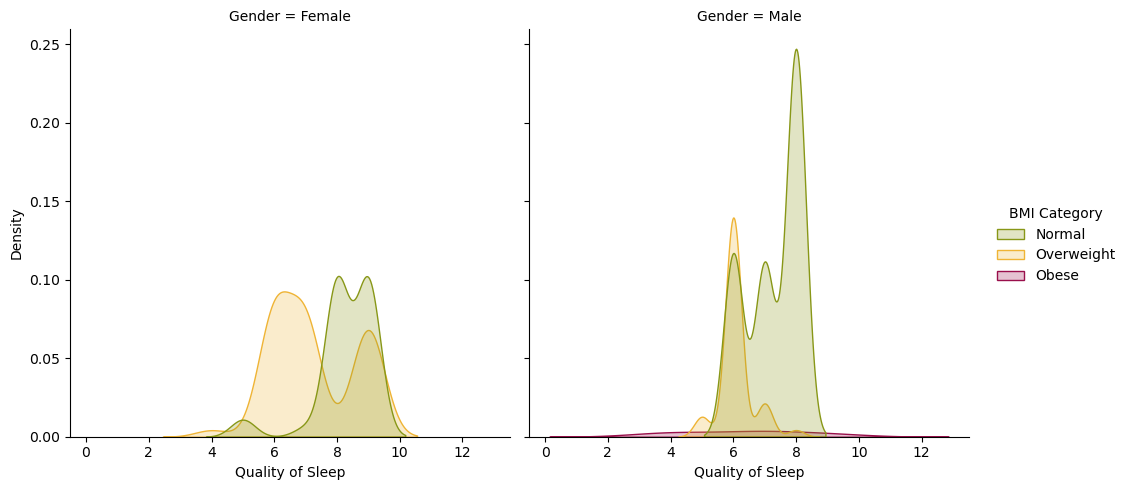

In [50]:
sns.displot(data=sleep_data, x='Quality of Sleep', col='Gender', kind='kde', hue='BMI Category', hue_order=['Normal', 'Overweight', 'Obese'], fill=True, common_norm=True)

So in conclusion: While _Kernel Density Estimation_ can provide us with neat visualizations, it can also be confusing and tricky to interpret. Make sure to always consider the scaling to avoid making wrong assumptions like the one we did above!

Another technique you can use for visualization is the **_bar plot_**, which you're definitely familiar with from everyday life, e.g. from surveys before elections. In _seaborn_, each bar shows an estimate - which is the _mean_ value by default, but can be changed by passing an `estimator` function - and an **_error bar_**, that helps to indicate the estimated error or uncertainty to give a general sense of how precise a measurement is, by using the _confidence interval_ (default with 95%, which corresponds to twice the standard deviation; 68% would be the single one) or the standard deviation (with the parameter `ci='sd'`).

The length of an error bar helps reveal the uncertainty of a data point: a short error bar shows that values are concentrated, signalling that the plotted average value is more likely, while a long error bar would indicate that the values are more spread out and less reliable.

Let's investigate the stress experienced by persons depending on their _BMI_ and gender:

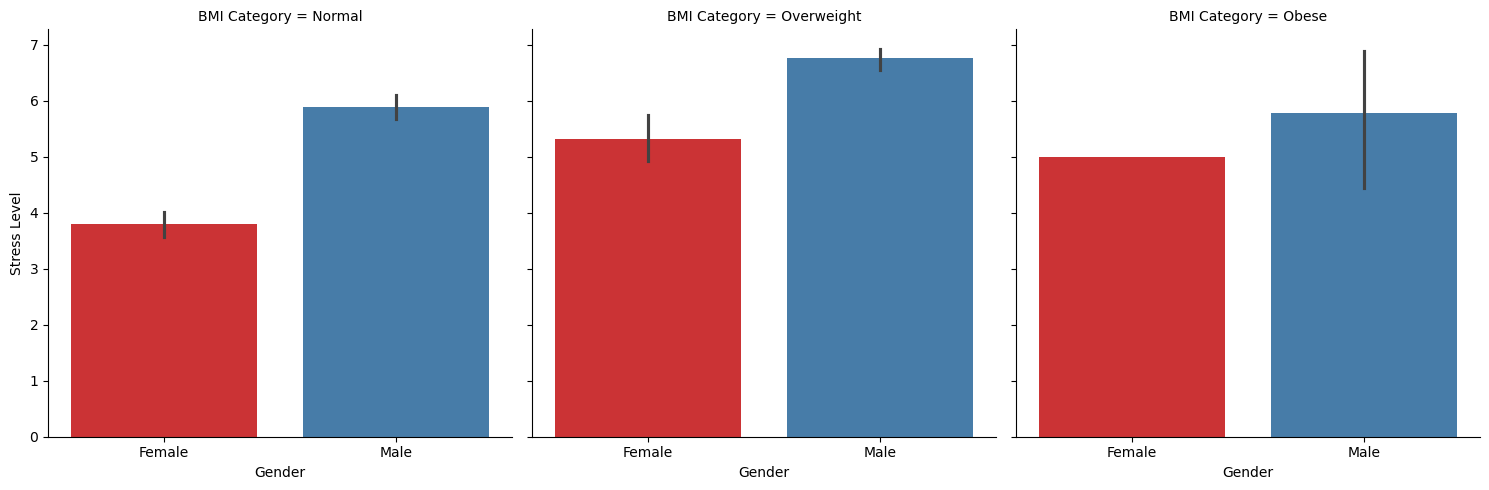

In [51]:
sns.catplot(data=sleep_data, x='Gender', col='BMI Category', y='Stress Level', kind='bar', col_order=['Normal', 'Overweight', 'Obese'], palette='Set1', hue='Gender')

# Visualizing _FIFA_ rankings

## Background

While plotting the number of _migrant workers_ (i.e. slaves) that died on the construction sites for the questionable 2022 world cup in Qatar would allow us to visualize the moral low point of football, it's obviously hard to find such a dataset.

Instead we'll be going with something less controversial: The _FIFA_ rankings of six countries over the span of 25 years.

![](images/fifa.jpg)

## Loading And Exploring The Data

You've guessed it: We're taking a first look at the data.

In [52]:
fifa_data = pd.read_csv('input/fifa_rankings.csv')

In [53]:
fifa_data.head()

Date   ARG  BRA   ESP   FRA  GER  ITA
0     08 August, 1993   5.0  8.0  13.0  12.0  1.0  2.0
1  23 September, 1993  12.0  1.0  14.0   7.0  5.0  2.0
2    22 October, 1993   9.0  1.0   7.0  14.0  4.0  3.0
3   19 November, 1993   9.0  4.0   7.0  15.0  3.0  1.0
4   23 December, 1993   8.0  3.0   5.0  15.0  1.0  2.0

In [54]:
fifa_data.tail()

Date  ARG  BRA   ESP  FRA  GER   ITA
281  15 February, 2018  4.0  2.0   6.0  9.0  1.0  14.0
282     15 March, 2018  4.0  2.0   6.0  9.0  1.0  14.0
283     12 April, 2018  5.0  2.0   8.0  7.0  1.0  20.0
284       17 May, 2018  5.0  2.0   8.0  7.0  1.0  20.0
285      07 June, 2018  5.0  2.0  10.0  7.0  1.0  19.0

In [55]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    286 non-null    object 
 1   ARG     286 non-null    float64
 2   BRA     286 non-null    float64
 3   ESP     286 non-null    float64
 4   FRA     286 non-null    float64
 5   GER     286 non-null    float64
 6   ITA     286 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


In [56]:
fifa_data.describe()

ARG         BRA         ESP         FRA         GER         ITA
count  286.000000  286.000000  286.000000  286.000000  286.000000  286.000000
mean     5.454545    3.171329    5.321678    8.958042    5.104895    8.353147
std      4.012659    3.620897    3.908787    6.822948    4.354813    4.514822
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      3.000000    1.000000    2.000000    3.000000    2.000000    4.000000
50%      5.000000    1.500000    5.000000    7.000000    4.000000    8.000000
75%      7.000000    4.000000    8.000000   15.000000    5.000000   12.000000
max     24.000000   22.000000   25.000000   27.000000   22.000000   20.000000

## _Wide-Form_- And _Long-Form_-Data

Let's take a closer look at the data:

In [57]:
fifa_data.sample(10)

Date   ARG   BRA   ESP   FRA   GER   ITA
1    23 September, 1993  12.0   1.0  14.0   7.0   5.0   2.0
175      11 March, 2009   6.0   5.0   1.0  12.0   2.0   4.0
45    18 February, 1998  17.0   1.0  23.0   6.0   2.0  14.0
12     25 October, 1994   9.0   1.0   6.0  19.0   4.0   2.0
222      14 March, 2013   3.0  18.0   1.0  17.0   2.0   5.0
36       09 April, 1997  19.0   1.0   4.0   3.0   2.0   7.0
62      18 August, 1999   6.0   1.0   7.0   2.0   5.0   4.0
55     27 January, 1999   6.0   1.0   9.0   2.0   5.0   4.0
90    19 December, 2001   2.0   3.0   7.0   1.0  12.0   6.0
7        19 April, 1994  10.0   1.0   7.0  15.0   2.0  13.0

The data we're dealing with is in the so-called *__wide-form__*: The rankings of the countries are spread across multiple columns, making each observation be defined by both the value and the respective row (in our case the `Date` would serve as index) and column (in our case the country).

On the contrast in *__long-form__* each observation has an own row - in our case that would consist of the `Date`, the country and the ranking.

We can use _pandas_ to convert from _wide-form_ to _long-form_ as follows:

In [58]:
fifa_data_long = fifa_data.melt(id_vars=['Date'], var_name='Country', value_name='Ranking')
fifa_data_long

Date Country  Ranking
0        08 August, 1993     ARG      5.0
1     23 September, 1993     ARG     12.0
2       22 October, 1993     ARG      9.0
3      19 November, 1993     ARG      9.0
4      23 December, 1993     ARG      8.0
...                  ...     ...      ...
1711   15 February, 2018     ITA     14.0
1712      15 March, 2018     ITA     14.0
1713      12 April, 2018     ITA     20.0
1714        17 May, 2018     ITA     20.0
1715       07 June, 2018     ITA     19.0

[1716 rows x 3 columns]

## _Line Plots_

Let's first switch to a qualitative color palette, so we can distinguish the countries in our plots:

In [59]:
sns.set_palette('Dark2')

A **_line plot_** (also known as _line chart_ or _line graph_) is a type of chart which displays information as a series of data points called _markers_ connected by straight line segments. It is similar to a _scatter plot_ except that the measurement points are ordered - typically by their `x`-axis value - and joined with straight line segments. A line chart is often used to visualize a trend in data over intervals of time, thus the line is often drawn chronologically.

Let's try it out with the _long-form_ dataset we've just created. Note the adjustment of the _ticks_ - i.e. the values used to show specific points on an axis - by using the _extended slice syntax_ (`start:stop:step`) to avoid overcrowding the x-axis. Uncomment the last line to see the difference!

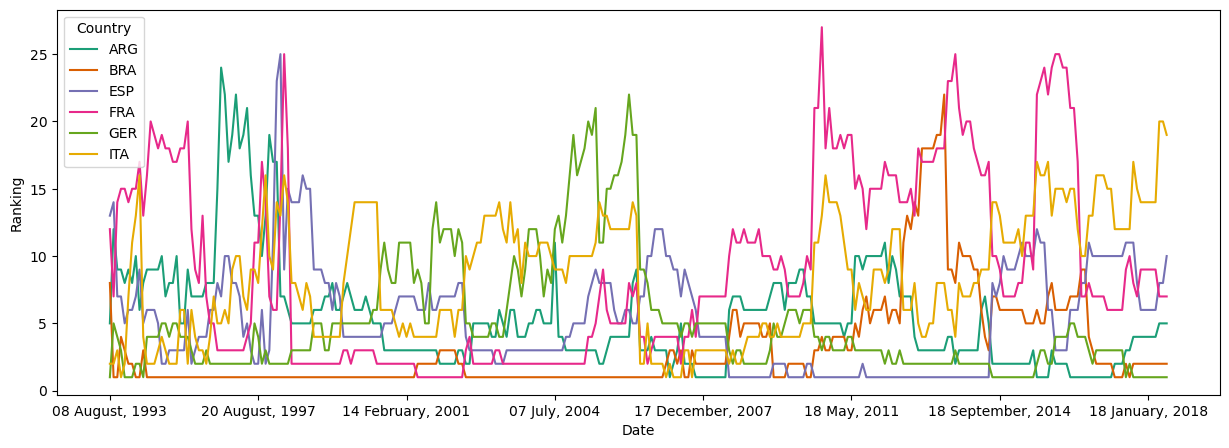

In [75]:
plt.figure(figsize=(15,5))
line_plot = sns.lineplot(data=fifa_data_long, x='Date', y='Ranking', hue='Country', dashes=False)
xticks = line_plot.get_xticks()
line_plot.set_xticks(xticks[::40]);

As you've seen, with _long-form_ data, we can access variables in the dataset by their name. That is not the case with _wide-form_ data. Nevertheless, because there is a clear association between the dimensions of the table and the variable in the dataset, _seaborn_ is able to assign those variables roles in the plot.

If we pass neither `x` nor `y` parameters, _seaborn_ treats the `data` as _wide-form_:

<Axes: >

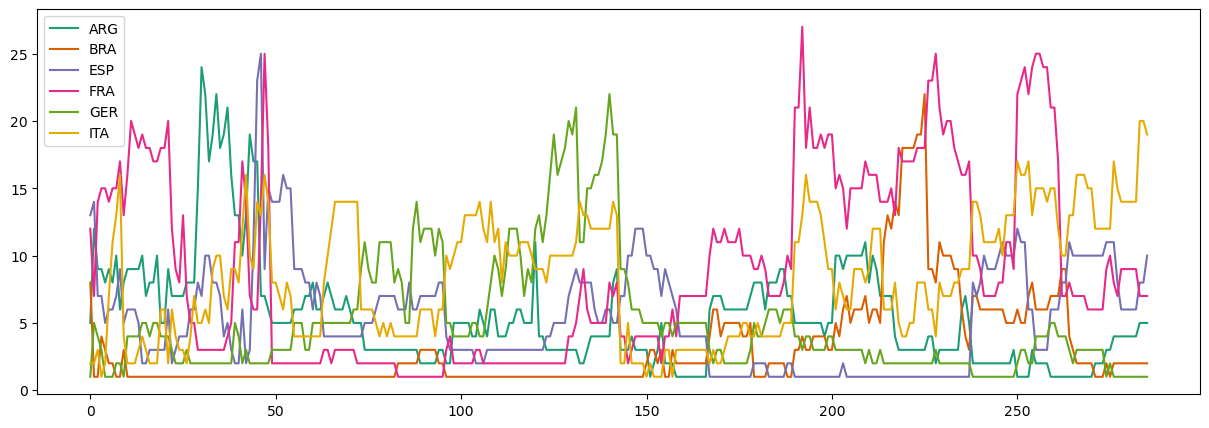

In [61]:
plt.figure(figsize=(15,5))
sns.lineplot(data=fifa_data, dashes=False)

The plot is pretty crowded: We can use _pandas_ to select only two countries and display them. We can also use _markers_ to show the data points:

<Axes: >

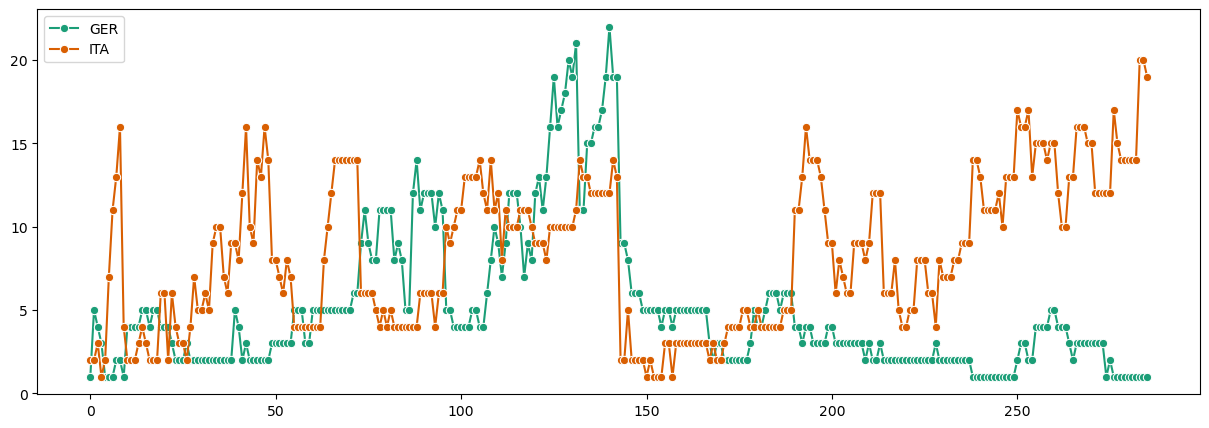

In [62]:
plt.figure(figsize=(15,5))
sns.lineplot(data=fifa_data.loc[:,['GER', 'ITA']], dashes=False, marker='o')

## Working With Date And Time

By now you surely ask yourself, if and how we can work with the `Date`-column. Let's take a closer look at it:

In [63]:
fifa_data['Date'].dtype

dtype('O')

N.B.: The `O` stands for _object_ - meaning the series contains _string_ (or mixed) values.

_pandas_ provides a method for parsing dates, which can be passed as single value or series. Note the change of data type:

In [64]:
fifa_data['Date'] = pd.to_datetime(fifa_data['Date'])
fifa_data['Date']

0     1993-08-08
1     1993-09-23
2     1993-10-22
3     1993-11-19
4     1993-12-23
         ...    
281   2018-02-15
282   2018-03-15
283   2018-04-12
284   2018-05-17
285   2018-06-07
Name: Date, Length: 286, dtype: datetime64[ns]

We can now use `loc` in combination with a boolean mask to select only a specific range we want to visualize:

<Axes: >

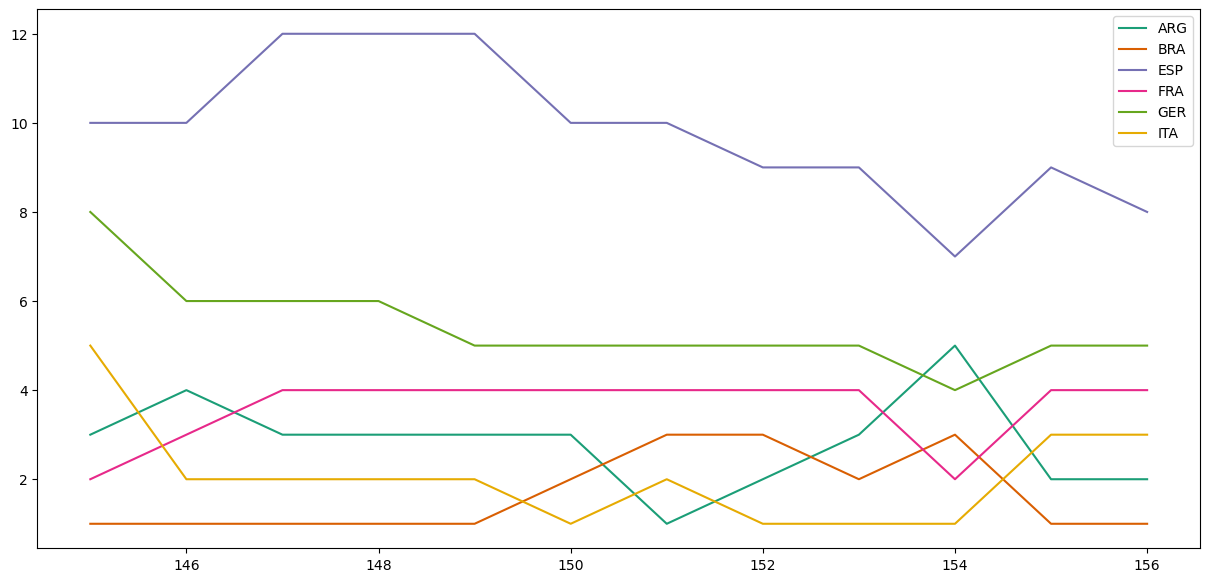

In [65]:
plt.figure(figsize=(15,7))
sns.lineplot(data=fifa_data.loc[('2006-09' < fifa_data['Date']) & (fifa_data['Date'] < '2007-09')], dashes=False)

Now that is pretty cumbersome... fortunately we have a better way!

Let's set the `Date` column as index:

In [66]:
fifa_data.set_index('Date', inplace=True)
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286 entries, 1993-08-08 to 2018-06-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ARG     286 non-null    float64
 1   BRA     286 non-null    float64
 2   ESP     286 non-null    float64
 3   FRA     286 non-null    float64
 4   GER     286 non-null    float64
 5   ITA     286 non-null    float64
dtypes: float64(6)
memory usage: 15.6 KB


Did you notice the data type of the index?

With a `DatetimeIndex` set, we can now use _slicing_ to achieve the same result with a much more readable syntax:

<Axes: xlabel='Date'>

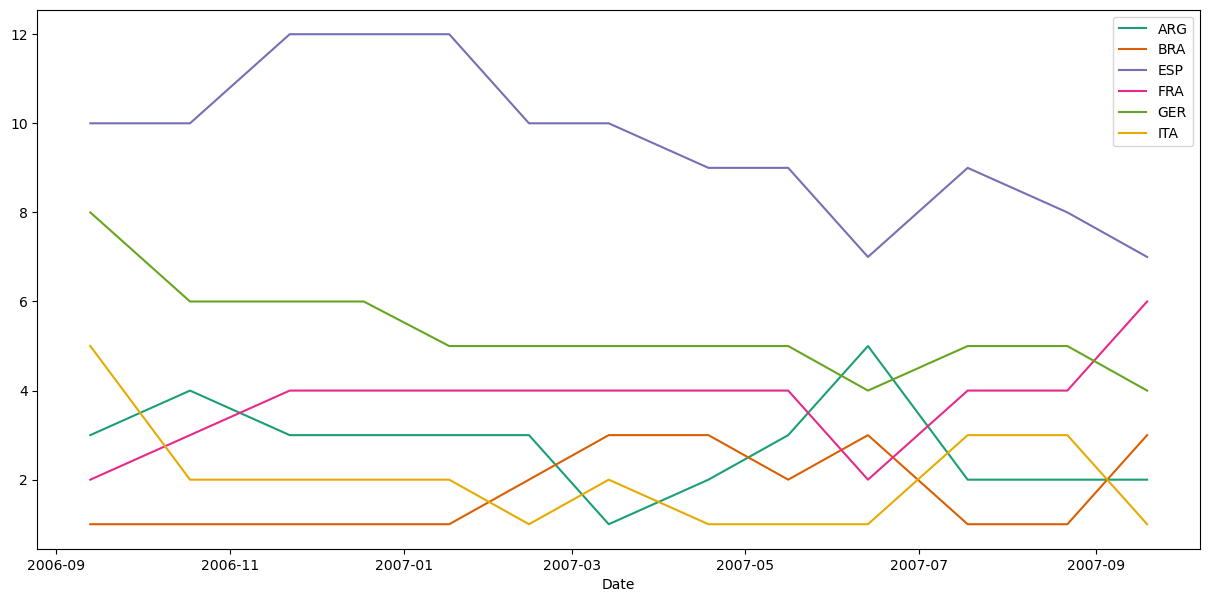

In [67]:
plt.figure(figsize=(15,7))
sns.lineplot(data=fifa_data['2006-09':'2007-09'], dashes=False)

N.B.: We took a slight detour for demonstration purposes - loading, parsing and setting the `DatetimeIndex` can actually be accomplished in one line:

In [68]:
fifa_data = pd.read_csv('input/fifa_rankings.csv', index_col='Date', parse_dates=True)
fifa_data

ARG  BRA   ESP   FRA  GER   ITA
Date                                        
1993-08-08   5.0  8.0  13.0  12.0  1.0   2.0
1993-09-23  12.0  1.0  14.0   7.0  5.0   2.0
1993-10-22   9.0  1.0   7.0  14.0  4.0   3.0
1993-11-19   9.0  4.0   7.0  15.0  3.0   1.0
1993-12-23   8.0  3.0   5.0  15.0  1.0   2.0
...          ...  ...   ...   ...  ...   ...
2018-02-15   4.0  2.0   6.0   9.0  1.0  14.0
2018-03-15   4.0  2.0   6.0   9.0  1.0  14.0
2018-04-12   5.0  2.0   8.0   7.0  1.0  20.0
2018-05-17   5.0  2.0   8.0   7.0  1.0  20.0
2018-06-07   5.0  2.0  10.0   7.0  1.0  19.0

[286 rows x 6 columns]

## _Rolling Average_

While being great at recognizing trends over a period of time, line plots can get chaotic if there's a lot of fluctuations from observation to observation. For this reason we can use a _rolling average_, also known as _moving average_ and _moving mean_.

The definition is simple: The _rolling average_ is an average of the last $n$ values in a data set, applied row-by-row, so that you get a series of averages.

The application is also simple, thanks to _pandas_:

In [69]:
fifa_data.rolling(window=5).mean().head(10)

ARG  BRA  ESP   FRA  GER   ITA
Date                                      
1993-08-08  NaN  NaN  NaN   NaN  NaN   NaN
1993-09-23  NaN  NaN  NaN   NaN  NaN   NaN
1993-10-22  NaN  NaN  NaN   NaN  NaN   NaN
1993-11-19  NaN  NaN  NaN   NaN  NaN   NaN
1993-12-23  8.6  3.4  9.2  12.6  2.8   2.0
1994-02-15  9.4  2.2  7.8  13.0  2.8   3.0
1994-03-15  8.6  2.4  6.2  14.6  2.0   4.8
1994-04-19  8.8  2.4  6.2  14.8  1.6   6.8
1994-05-17  8.2  1.8  6.6  15.2  1.4   9.8
1994-06-14  8.2  1.8  6.6  14.8  1.4  10.2

Obviously, the first $n-1$ values can't be calculated.

Let's see, what effects different `window` sizes have on our visualization:

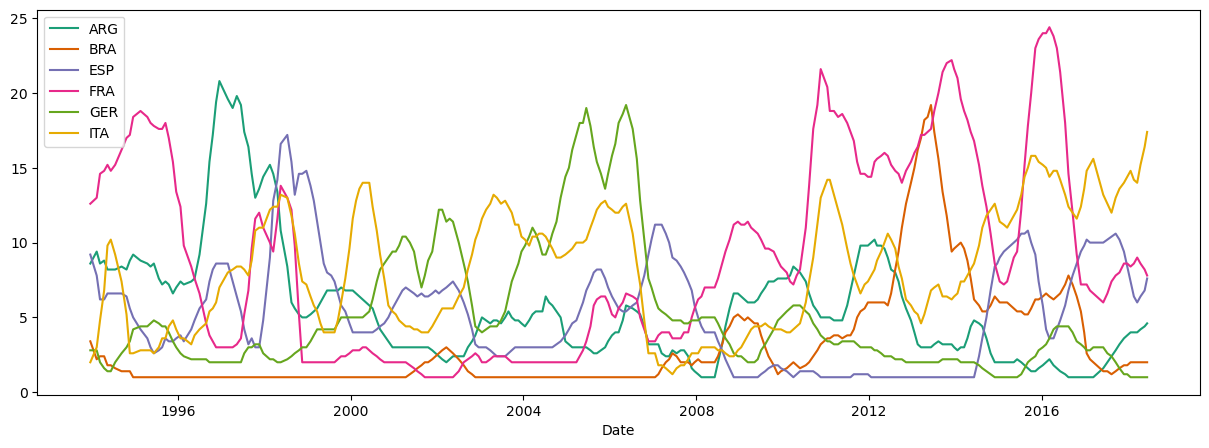

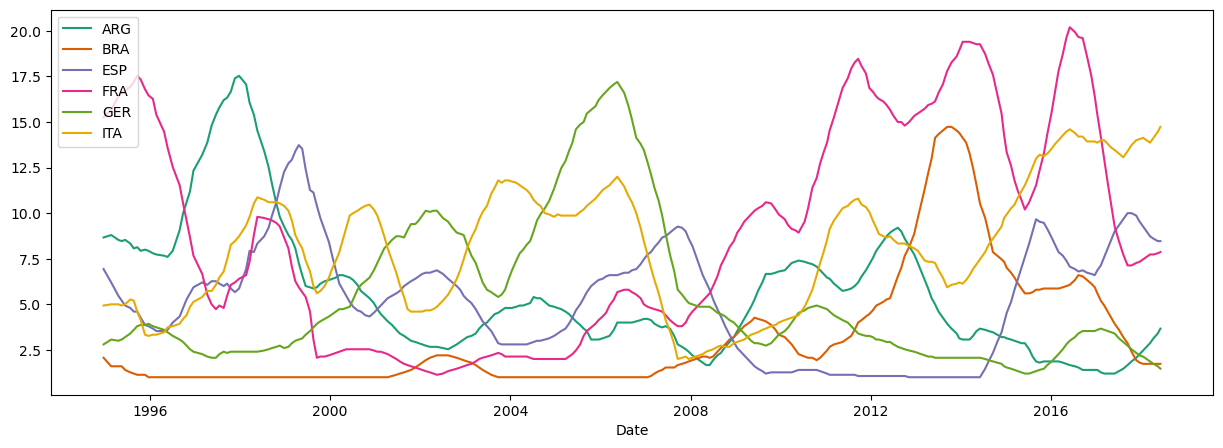

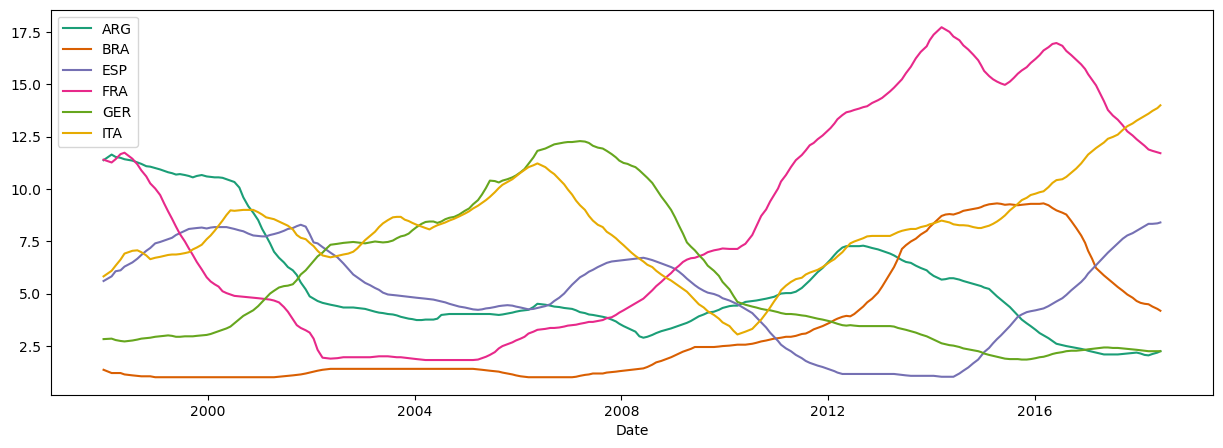

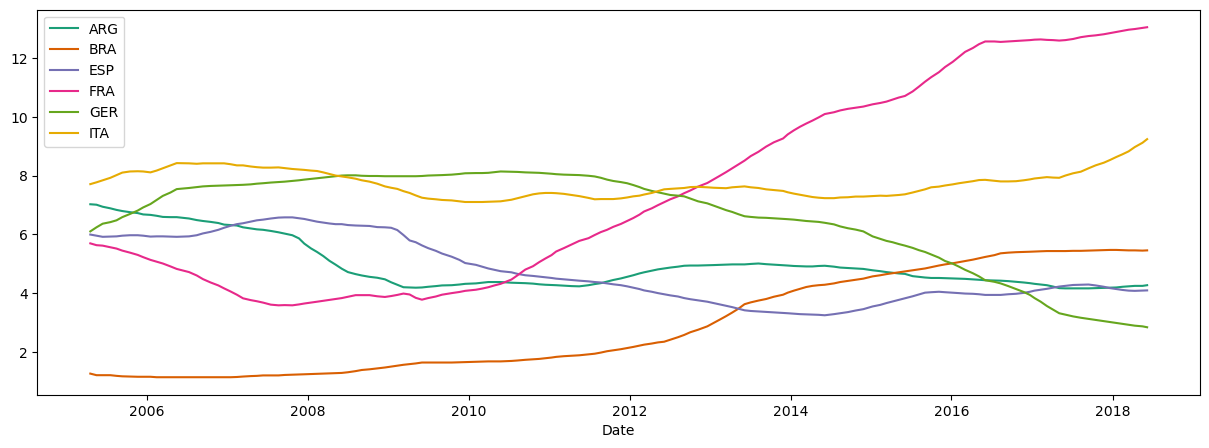

In [70]:
for i in [5, 15, 45, 130]:
    plt.figure(figsize=(15,5))
    sns.lineplot(data = fifa_data.rolling(window=i).mean() , dashes=False)

# Have Fun Using _Seaborn_!

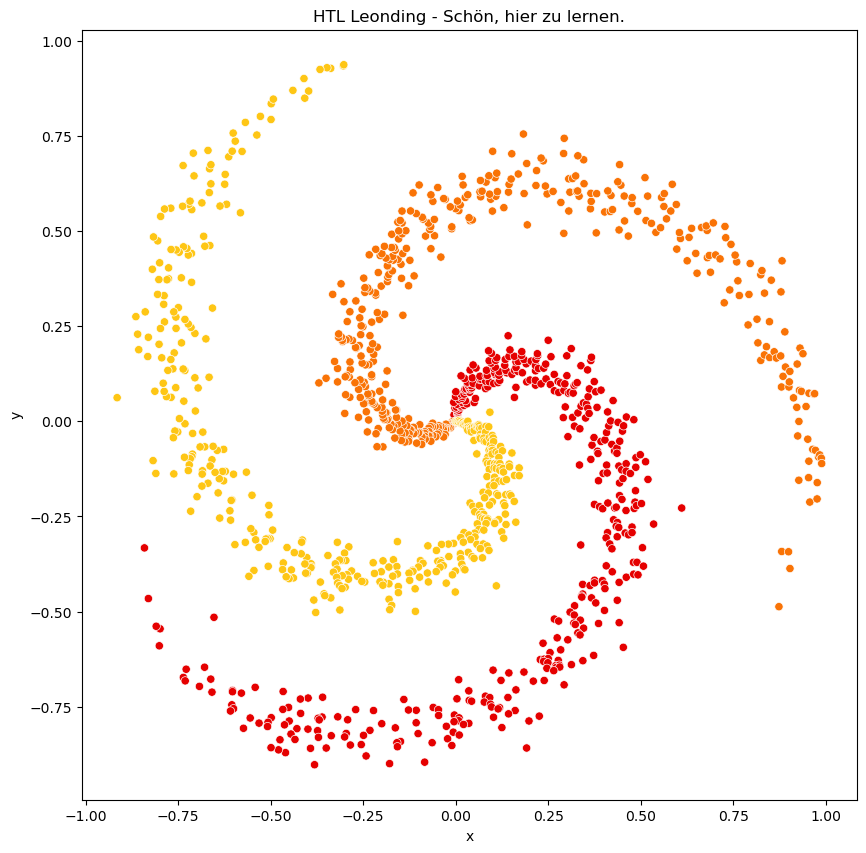

In [71]:
spirals_data = pd.read_csv('input/spirals.csv')
leo_colors = sns.xkcd_palette(['red', 'orange', 'golden yellow'])
plt.figure(figsize=(10,10))
sns.scatterplot(data=spirals_data, x='x', y='y', hue='label', palette=leo_colors, legend=False).set(title='HTL Leonding - Schön, hier zu lernen.');